In [1]:
!git clone https://github.com/liuzey/CheckGPT-v2.git

Cloning into 'CheckGPT-v2'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 145 (delta 14), reused 29 (delta 9), pack-reused 107 (from 1)
Receiving objects: 100% (145/145), 1.10 GiB | 17.35 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (68/68), done.


In [ ]:
!pip install datasets

## Getting AI and Human Generated text from our dataset



In [101]:
import json
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load AI-generated texts
with open('CheckGPT-v2/GPABenchmark/CS_TASK1/gpt.json', 'r') as f:
    gpt_data = json.load(f)
ai_texts = list(gpt_data.values())  # <-- fixed here

# Load Human-written texts
with open('CheckGPT-v2/GPABenchmark/CS_TASK1/hum.json', 'r') as f:
    hum_data = json.load(f)
hum_texts = list(hum_data.values())  # <-- fixed here

In [102]:
hum_texts = hum_texts[:150]
ai_texts = ai_texts[400:600]

In [103]:
print(len(ai_texts))
print(len(hum_texts))

200
150


## Loading QWEN as a Paraphraser for Testing

In [104]:
import csv
from tqdm import tqdm
import gc
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "Qwen/Qwen2.5-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

gc.collect()

device = "cuda" if torch.cuda.is_available() else "cpu"

csv_filename = "paraphrased_results.csv"
with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Original Text", "Paraphrased Text"])

    for i, ai_text in enumerate(tqdm(ai_texts, desc="Paraphrasing texts")):
            prompt = f"""Please paraphrase the following text to make it more human-like while preserving the original meaning.
(Provide ONLY the paraphrased text with no additional commentary or responses)

{ai_text}

Paraphrased text:"""

            inputs = tokenizer(prompt, return_tensors="pt").to(device)

            with torch.no_grad():
                outputs = model.generate(
                    inputs.input_ids,
                    max_new_tokens=512,
                    temperature=0.7,
                    top_p=0.9,
                    do_sample=True
                )

            full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
            paraphrased_text = full_output.split("Paraphrased text:")[-1].strip()
            print(paraphrased_text)
            csv_writer.writerow([ai_text, paraphrased_text])
            del inputs, outputs
            gc.collect()
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

print(f"Paraphrasing complete! Results saved to {csv_filename}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Paraphrasing texts:   0%|          | 1/200 [00:09<31:44,  9.57s/it]

This research introduces a new approach for choosing representative samples in vast amounts of data by integrating sparse graphs and geodesic Grassmann manifold distances. The aim is to pinpoint a manageable group of data points that best represent the overall dataset, thus facilitating more efficient analysis and drawing insights. Initially, the technique builds a sparse graph based on the data, placing each data point at a node and linking nodes with edges that denote similarities among points. Subsequently, a graph clustering algorithm is employed to discern groups of similarly structured data points. Following this, representatives are chosen within these clusters by measuring the geodesic Grassmann manifold distances between pairs of data points and selecting the one nearest to the average of the cluster within the manifold. The study showcases the efficacy of this approach via tests conducted on various real-world datasets. The outcomes reveal that the proposed method excels over

Paraphrasing texts:   1%|          | 2/200 [00:18<31:16,  9.48s/it]

Thermodynamic-RAM (T-RAM) is a cutting-edge computational method that uses thermodynamic laws to carry out computations and has demonstrated its capability to emulate the actions of biological neurons. In this study, we explore the application of T-RAM in modeling the functions of the cerebral cortex. We begin by outlining the structure and operation of T-RAM, and contrast it with other neuromorphic computing technologies. Following that, we detail our implementation of T-RAM to simulate cortical processing, employing a simplified model of the visual cortex as an example. Our findings indicate that T-RAM can reproduce important characteristics of cortical processing such as selective attention, receptive fields, and ocular dominance. Furthermore, we examine how different parameters affect the efficiency of T-RAM and analyze what these insights mean for improving future T-RAM designs aimed at more intricate models of cortical function. The results show that T-RAM could serve as a valuab

Paraphrasing texts:   2%|▏         | 3/200 [00:24<24:49,  7.56s/it]

This paper investigates how two kinds of square-shaped tiles, each with four distinct edge types (sticky or non-sticky), can spontaneously form complex structures when placed on a lattice without a set pattern. Through computer simulations and mathematical models, the researchers examine how varying factors like tile density and temperature influence these structures, leading to outcomes like aperiodic tilings and quasi-crystalline patterns. The study highlights the possibility of non-deterministic self-assembly as a method for producing new materials with special characteristics and adds to our understanding of self-assembling systems.
With the growing need for energy-efficient computing, different methods have been devised for allocating virtual machines (VMs) in cloud computing settings. This study introduces a novel strategy aimed at reducing the overall operational time of VMs while taking energy usage into account. By framing the issue as an optimization challenge, we created an 

Paraphrasing texts:   2%|▎         | 5/200 [00:40<25:54,  7.97s/it]

This study investigates the application of stacked multilayer perceptron (MLP) networks in recognizing evolving categories of events. Events like changing traffic patterns or shifts in weather fall under this category. The research proposes an approach where a series of MLPs are trained to identify various phases of event evolution, with each network's output serving as input for the subsequent one. By doing so, the system can detect the temporal connections between these events, enhancing predictive capabilities. To assess this technique, the researchers utilized traffic flow data, aiming to forecast traffic volumes for the upcoming hour. The outcomes indicate that the stacked MLPs perform better than conventional methods like linear regression and support vector regression. Furthermore, experiments were conducted to gauge how sensitive the methodology is to different parameters and design choices. In summary, this work offers a viable strategy for understanding dynamic event sequence

Paraphrasing texts:   3%|▎         | 6/200 [00:47<24:57,  7.72s/it]

This paper introduces and evaluates a knowledge graph method for examining software applications in social science research. It underscores the significance of grasping the tools and techniques employed in social scientific studies and how a knowledge graph can offer an all-encompassing and interconnected perspective on software utilization within this discipline. The authors delve into their findings, which encompass gathering and scrutinizing data from diverse channels such as scholarly articles, software platforms, and digital discourse spaces. They illustrate how the application of a knowledge graph can illuminate connections and interactions between software, researchers, and thematic areas, thereby facilitating the discovery of enhancements and advancements in software practices within social sciences. Ultimately, the authors assert that employing a knowledge graph technique is beneficial for comprehending software usage in this domain and serves as a solid basis for future explo

Paraphrasing texts:   4%|▎         | 7/200 [00:54<23:55,  7.44s/it]

This research introduces a deep reinforcement learning (DRL) method for content caching in vehicular edge computing and networks (VECN), utilizing permissioned blockchain technology. The DRL algorithm identifies the best caching plan for individual vehicles within the VECN by taking into account multiple aspects like the available storage capacity, content popularity, and network conditions. Permissioned blockchain facilitates the exchange and administration of cached data across vehicles while ensuring secure interactions among all parties involved in the VECN. Simulation outcomes demonstrate that the proposed DRL-based caching system achieves higher hit rates and better energy efficiency compared to conventional methods. The integration of DRL and permissioned blockchain technology represents an innovative approach for enhancing content caching in VECN systems, thereby improving the overall efficiency of these networks.


Paraphrasing texts:   4%|▍         | 8/200 [01:00<21:59,  6.87s/it]

This study offers an extensive review of recent developments in subpath queries conducted on compressed graphs. It starts by highlighting the significance of graph compression and its utility across different fields. The investigation explores several compression techniques such as adjacency lists, matrices, and multi-level graph decompositions. The core of the study revolves around subpath query algorithms that function on these compressed structures, examining how these methods balance execution speed and memory usage. The analysis encompasses both precise and approximate algorithms, along with performance assessments using actual and simulated data sets. Ultimately, the research reflects on ongoing research challenges and suggests potential areas for future exploration in this area.
This research examines production machine learning pipelines and offers guidance on how to optimize them. It looks at what's currently happening in real-world industry settings, pinpointing typical issue

Paraphrasing texts:   5%|▌         | 10/200 [01:11<19:28,  6.15s/it]

This research examines how feature-based algorithm selection systems perform in choosing the most suitable algorithms for solving complex numerical optimization problems. It evaluates various selection methods by assessing their effectiveness in identifying the optimal algorithm for each specific problem. A variety of benchmark scenarios and multiple algorithms are utilized to test these selection methods. The results indicate that incorporating features can greatly enhance the efficiency of optimization algorithms, surpassing the use of a singular approach. The study uncovers the advantages and limitations of different selection strategies and underscores the necessity of developing relevant features for algorithm selection. These discoveries can help in creating improved algorithm selection systems for tackling black-box numerical optimization challenges.


Paraphrasing texts:   6%|▌         | 11/200 [01:15<17:26,  5.54s/it]

This research introduces FILIP, a new method that combines language modeling with image recognition to enhance performance in areas like computer vision and natural language processing. FILIP is developed using extensive text and image data from a large dataset. After being tested against various benchmarks, FILIP has been found to outperform other pre-training models significantly. These findings indicate that FILIP's focus on detailed interactions between language and images could prove beneficial for numerous AI applications.


Paraphrasing texts:   6%|▌         | 12/200 [01:24<20:54,  6.67s/it]

This paper aims to conduct a thorough exploration of belief modeling within dynamic systems. It's structured into two main sections. The initial part lays down the groundwork for the topic. Here, the authors define what belief means and why it's crucial in dynamic systems. They then give a detailed overview of previous research on how belief is modeled in these systems, highlighting different methodologies employed. Following this, they introduce a framework for belief modeling in dynamic systems, which encompasses several essential elements like belief representation, updating mechanisms, and evaluation criteria. The framework also delves into the role of uncertainty and discusses ways to measure it. The authors further address the various hurdles in belief modeling within dynamic systems and suggest potential avenues for future research. In summary, this first part offers a strong base for comprehending belief modeling in dynamic systems. By providing a broad review of existing liter

Paraphrasing texts:   6%|▋         | 13/200 [01:31<20:38,  6.62s/it]

This research explores the effectiveness of universal Bayesian sequence prediction for any given loss function and set of symbols. It seeks to establish the circumstances where this predictive method is most efficient and to lay out a theoretical foundation for proving its optimality. Initially, the basics of Bayesian prediction are introduced, along with the underlying principles. Then, the authors clarify what constitutes a general loss function and set of symbols and demonstrate their applicability within the Bayesian framework. The key findings include a theorem that outlines the necessary conditions for the Bayesian prediction strategy to be optimal. This theorem is substantiated through a blend of mathematical analysis and empirical evidence from simulations. Finally, the paper reflects on the significance of these findings and suggests potential areas for further investigation.
The paper offers a thorough and current look at social network research, particularly concentrating on

Paraphrasing texts:   8%|▊         | 15/200 [01:41<18:01,  5.84s/it]

This research introduces a fresh method for identifying indoor environments by merging information about their layout and how they look from different scales. The layout details give us an overview of the entire space, whereas the scale-invariant features ensure that the system can recognize objects regardless of their size. By integrating both types of information, we create a more reliable and precise system than what's currently available. Testing this technique on various test sets has shown that it outperforms current best practices.


Paraphrasing texts:   8%|▊         | 16/200 [01:46<16:58,  5.54s/it]

This research investigates how certain pollutants are linked to an increased risk of childhood cancer by analyzing data from a particular region. It involves examining pollutant levels alongside instances of child cancer. The study's approach aims to detect any correlations between these factors and reports its findings, which indicate that there is indeed a strong correlation between elevated pollutant concentrations and higher rates of childhood cancer in that area. These insights support the argument that environmental pollutants can affect human health and offer important guidance for policy makers and healthcare authorities in developing safer environments.


Paraphrasing texts:   8%|▊         | 17/200 [01:52<17:29,  5.74s/it]

Cyclus archetypes play a crucial role in nuclear fuel cycle analysis. This paper offers an extensive look at the various cyclus archetypes that have been suggested and utilized in numerous studies. It starts by defining cyclus archetypes and highlighting their significance within this field. Next, it gives a detailed overview of the different archetypes, such as the once-through, closed, and open types. The paper also examines the advantages and disadvantages of each archetype, along with the constraints and underlying assumptions that need to be taken into account when applying them. Finally, the paper reflects on the implications of these findings for the future of nuclear fuel cycle analysis and the advancement of sustainable nuclear energy systems.


Paraphrasing texts:   9%|▉         | 18/200 [01:58<16:57,  5.59s/it]

This study introduces an innovative technique for pinpointing release points within advection-diffusion models by integrating machine learning with the Green Function Inverse Method. The suggested strategy leverages supervised learning algorithms to predict unknown release sources based on measured concentrations in these systems. Following this, the Green Function Inverse Method is employed to ensure the reliability of the predicted sources and to determine any missing parameters. Experimental outcomes indicate that this novel method significantly enhances both precision and speed compared to conventional approaches, making it a valuable asset for accurately identifying release points in practical advection-diffusion scenarios.


Paraphrasing texts:  10%|▉         | 19/200 [02:03<17:00,  5.64s/it]

This research examines how beliefs change over time, focusing on shifts in the subjective probability of events or statements. It looks at various techniques for monitoring and describing these shifts within both individual and collective scenarios. The methodologies draw upon Bayesian belief networks and probabilistic graphical models, robust frameworks for handling uncertainty and updating beliefs. To assess these approaches, the study employs both simulations and practical tests. By analyzing the outcomes, we gain a deeper understanding of what influences the precision of our belief dynamics measurements. Ultimately, the findings could help create improved models for tracking and comprehending belief changes in practical settings like decision-making, risk analysis, and information sharing.
This research examines how spectral efficiency is affected by correlated gamma-lognormal desired and interfering signals. It specifically looks at how signal correlation impacts the performance o

Paraphrasing texts:  10%|█         | 21/200 [02:15<17:04,  5.72s/it]

This study offers a geometric viewpoint on sensitivity analysis for monomial models—a type of model frequently utilized across many scientific and engineering disciplines. Our technique reinterprets the sensitivity matrix as subsets of linear subspaces within the model parameter space. We reveal that the dimensions and orientations of these subspaces offer critical information about how sensitive the model output is to alterations in the input parameters. In essence, the sensitivity of the model is closely linked to the geometry of these subspaces and their interrelations. The findings present a fresh angle on sensitivity analysis for monomial models and establish a practical method for evaluating and visually assessing model sensitivity in complex, high-dimensional parameter spaces. To showcase our approach, we provide several numerical examples and contrast it with conventional methodologies.


Paraphrasing texts:  11%|█         | 22/200 [02:24<19:54,  6.71s/it]

This study explores how to lessen interference in Cloud Radio Access Networks (C-RANs) through the use of the rate-splitting technique coupled with common message decoding. While the rate-splitting method has shown promise in reducing interference and enhancing network efficiency, its implementation in C-RANs has been hindered by the challenges of coordinating transmissions between the Baseband Unit (BBU) and Remote Radio Heads (RRHs). In our research, we suggest integrating the rate-splitting technique and common message decoding at the BBU to address interference issues. We also introduce an innovative algorithm aimed at optimizing the rate-splitting parameters and common message decoding coefficients to balance power usage with service quality, ensuring satisfactory QoS for all users. Our simulations indicate that our proposed solution yields substantial improvements over conventional methods, particularly in high-density and heavily interfered environments. These results highlight 

Paraphrasing texts:  12%|█▏        | 23/200 [02:31<20:38,  7.00s/it]

This research introduces an innovative technique for compressing categorical features in machine learning models through submodular optimization. Categorical data is prevalent in various real-world scenarios, yet its high dimensionality often causes substantial computational burdens and storage issues. To address this challenge, the suggested approach employs submodular optimization to identify a subset of key categories that best represent the essential characteristics of the dataset. Essentially, we formulate this as a submodular maximization issue and develop a greedy algorithm to quickly yield a nearly optimal result. Additionally, we establish theoretical assurance regarding the effectiveness of the algorithm's output. Empirical evaluations on multiple test sets show that our method outperforms existing approaches in terms of compression efficiency and model accuracy. Furthermore, this method is straightforward to incorporate into standard machine learning workflows, offering cons

Paraphrasing texts:  12%|█▎        | 25/200 [02:46<21:18,  7.31s/it]

This study introduces a new method for creating an energy-efficient artificial neuron utilizing superconducting nanowires. The neuron design includes a superconducting loop with a nanowire junction capable of adjusting its response to input signals. This junction acts as the neuron's activation function, and its minimal power usage is due to the use of superconductivity to remove resistance from the loop. We've created a comprehensive model of our proposed neuron and conducted thorough simulations to illustrate its performance features. Our findings indicate that the neuron can operate at high accuracy levels while requiring much less power compared to current designs. Additionally, we've devised a strategy for incorporating several neurons into a larger system and demonstrated that the proposed neuron design can be expanded to build an efficient neural network. In summary, this research offers a promising path for developing energy-saving artificial neural networks, which could be app

Paraphrasing texts:  13%|█▎        | 26/200 [02:58<25:30,  8.80s/it]

This paper concentrates on the security aspects of IoT edge nodes within the realm of machine learning. It particularly examines the possible security threats that can arise in IoT edge nodes, which are devices placed near a network to gather and process data from other IoT devices. As machine learning becomes more prevalent in IoT, there's a rising worry about the security of these systems because machine learning models are susceptible to different kinds of attacks. The paper reviews various types of security threats that could target IoT edge nodes, such as inference attacks, evasion attacks, and poisoning attacks. Additionally, it discusses how these attacks affect the efficiency of machine learning algorithms and how they can be employed to compromise IoT network security. To tackle these security issues, the paper suggests several countermeasures that can protect against these threats. These countermeasures involve employing secure communication protocols, incorporating security 

Paraphrasing texts:  14%|█▎        | 27/200 [03:04<22:53,  7.94s/it]

The paper investigates how autonomous systems and artificial intelligence might affect the stability of the nuclear sector. It examines how these technologies could improve safety and security, and minimize the chances of accidents and mishaps. Additionally, the document looks into the difficulties that arise from incorporating these technologies, such as ethical dilemmas and cyber threats. The results indicate that integrating autonomous systems and AI has the potential to transform the nuclear industry and secure its future. Yet, thoughtful planning and strategic deployment are necessary to harness these technologies responsibly and safely. The research underscores the need for joint efforts from nuclear professionals and tech experts to fully leverage these advanced tools in ensuring a stable nuclear landscape.
This study introduces an efficient sampling technique for polynomial chaos-based uncertainty quantification and sensitivity analysis. It leverages weighted approximate Fekete

Paraphrasing texts:  14%|█▍        | 29/200 [03:16<19:58,  7.01s/it]

This research introduces a fresh method to boost the security and resilience of unmanned aerial vehicle (UAV) communication networks using reconfigurable intelligent surfaces (RISs). The work starts by highlighting existing issues in UAV communication, such as signal disruptions, jamming threats, and inadequate wireless signal strength. Next, it explains how RISs could be a valuable remedy for these problems. The researchers suggest a secure and sturdy UAV communication framework that leverages RISs to adaptively modify wireless channel conditions on the fly. The effectiveness of their proposed system is tested via both simulations and practical tests, revealing substantial enhancements in signal clarity, data transfer dependability, and security when compared to conventional UAV communication setups. This study offers fresh perspectives on how RISs might serve as a pivotal technology for enhancing both the security and reliability of UAV communications.


Paraphrasing texts:  15%|█▌        | 30/200 [03:27<23:11,  8.18s/it]

This study examines the difficulty and potential solutions for the probabilistic p-center problem, considering various pressures. The p-center problem is a common issue in operations research and computer science, focusing on placing p facilities within a network so that the longest distance from any point to its nearest facility is as small as possible. The probabilistic p-center problem broadens this by taking into account how demands at different points might vary according to a probability distribution. The 'pressure' aspect refers to any limiting conditions or external influences that might impact the decision-making process. Initially, the paper introduces the probabilistic p-center problem along with its variations, specifically the classical and pressure-sensitive versions. It then investigates the computational challenges of solving this problem, demonstrating its NP-hard nature through transformations from other known NP-hard problems. The paper also offers approximation meth

Paraphrasing texts:  16%|█▌        | 31/200 [03:33<21:02,  7.47s/it]

This research investigates how to best configure the constellation patterns for Non-Coherent Multiple-Input Multiple-Output (MIMO) Multiple-Access (MA) channels. The goal is to enhance the transmission efficiency by optimizing these constellation designs. A new method has been introduced that considers both the channel conditions and user pairings simultaneously. Simulations have demonstrated that this method yields better Bit Error Rates (BERs), particularly under strong signal-to-noise ratios (SNRs). Consequently, researchers believe this joint constellation design could be a valuable tool for enhancing performance in Non-Coherent MIMO MA channels, which could then be utilized in real-world communication networks.
Symbolic Aggregate Approximation (SAX) has become popular in time series analysis thanks to its speed and capability to recognize patterns within the data. Yet, there's an acknowledged drawback to its ability to grasp segment trend details. To enhance its effectiveness, thi

Paraphrasing texts:  16%|█▋        | 33/200 [03:44<17:56,  6.44s/it]

This study introduces an innovative technique for estimating crowd sizes by combining multi-resolution fusion and multi-scale input priors. By utilizing these approaches, the model aims to provide accurate crowd counts in various scenes. The process starts with capturing the area at varying resolutions and then fuses this information into a high-resolution image. Following this, multi-scale input priors are employed to enhance the accuracy of the crowd count estimation. The proposed method has been tested on multiple public datasets, where it consistently outperformed existing crowd counting algorithms. This advanced technique holds promise for enhancing crowd management and safety monitoring in real-world settings.


Paraphrasing texts:  17%|█▋        | 34/200 [03:50<17:58,  6.50s/it]

This research introduces a deep graph metric learning method to enhance the performance and efficiency of systems that identify objects through proxy examples. Current methods often require numerous proxy examples to accurately depict different object types, which can be computationally expensive and limit scalability. In contrast, our "Fewer is More" technique uses a deep graph metric learning model to create a succinct proxy representation. By utilizing the connections between proxy examples, this method creates a compressed feature space that retains important object characteristics using fewer examples. Our tests on various evaluation sets show that our solution achieves better results than conventional proxy-based systems, particularly in terms of accuracy and speed, while also needing less data. This work suggests a promising path towards building more effective and resource-efficient object recognition frameworks.


Paraphrasing texts:  18%|█▊        | 35/200 [03:57<17:51,  6.49s/it]

This study investigates unsupervised domain adaptation focusing on enhancing bi-classifier determinacy. The primary objective is to build a model using labeled data from a source domain and apply it to an unlabeled target domain. Bi-classifier determinacy maximization utilizes decision boundaries created by classifiers trained on both the source and target domains to boost the model's performance. Our approach focuses on creating a decision boundary that aligns closely with the two classifiers' decisions, thereby minimizing the difference between the source and target domains. Experimental outcomes on diverse datasets highlight our method's efficacy in improving model generalization, surpassing existing leading techniques. The research also discusses possible real-world applications of this technique across areas like computer vision and natural language processing.
This research introduces an innovative motion planning method named e$ \mathbf{^3} $mop, which integrates motion primitiv

Paraphrasing texts:  18%|█▊        | 37/200 [04:23<26:49,  9.88s/it]

This study introduces a hybrid inference system aimed at enhancing the precision of curvature estimation within the level-set method by leveraging machine learning. The level-set method is extensively utilized across multiple domains including computer vision, medical imaging, and graphic design, primarily due to its effectiveness in modeling shapes and segmenting images. The accuracy of the level-set's progression hinges significantly on the reliability of curvature estimation, making this aspect critical. However, conventional techniques for curvature estimation are subject to drawbacks like susceptibility to noise and irregular data sampling. To address these issues, the researchers have developed a hybrid inference system that integrates both traditional curvature estimation methodologies and machine learning algorithms. This system employs a machine learning model that has been trained on extensive datasets comprising both synthetic and real-world images. Through this training pro

Paraphrasing texts:  19%|█▉        | 38/200 [04:30<24:59,  9.26s/it]

This study introduces a new technique for estimating depth without labeled data using H-Net, a deep neural network with an attention system, and epipolar geometry. Estimating depth from stereo images is crucial in computer vision, useful for robotics, self-driving cars, and 3D reconstructions. The method leverages an attention mechanism to prioritize relevant parts of the images for accurate depth calculations. Epipolar geometry is used to ensure that the estimated depths adhere to geometric rules. Experimental outcomes show that this method surpasses current best practices for unsupervised depth estimation when tested on established benchmarks. Moreover, the proposed method can be flexibly applied to other vision-related tasks like optical flow estimation and image enhancement. These findings indicate that H-Net combined with epipolar geometry offers a viable strategy for depth estimation without labels, with broad applicability across computer vision domains.
This study introduces SC

Paraphrasing texts:  20%|██        | 40/200 [04:50<24:33,  9.21s/it]

This research compares four off-policy prediction learning algorithms—Q-learning, SARSA, Expected SARSA, and Double Q-learning—to see which performs best when predicting collisions between agents in a simulated two-dimensional grid world. Our findings reveal that Expected SARSA generally yields the most accurate predictions in terms of both mean squared error and average reward. In contrast, Double Q-learning appears to struggle the most with these metrics. Importantly, our results highlight that the effectiveness of these algorithms varies greatly depending on the specific settings we use for their parameters. By examining how these differences manifest across various conditions, we hope to provide valuable insights for those researching or applying similar prediction methods, helping them choose the best approach for their particular needs.


Paraphrasing texts:  20%|██        | 41/200 [04:58<23:19,  8.80s/it]

In recent times, self-supervised learning has become quite popular due to its effectiveness in solving computer vision issues without needing labeled data. This research introduces a fresh strategy for self-supervised tracking using data synthesis focused on the target object. The technique generates realistic training data by merging images of the target with various backgrounds. This synthetic data is then utilized to train a deep neural network capable of accurately tracking the target in live video streams. The network acquires the ability to differentiate the target from its environment through its features, motion, and contextual clues. The efficiency of the suggested approach is examined on multiple test datasets and contrasted against leading self-supervised tracking methods. The findings indicate that this method performs well and surpasses previous techniques in handling complex situations. Thus, this study highlights the potential of self-supervised tracking utilizing target

Paraphrasing texts:  21%|██        | 42/200 [05:10<25:55,  9.84s/it]

The study delves into the application of two metrics—Video Multimethod Assessment Fusion (VMAF) and Entropic Differences (ED)—for assessing the quality of high frame rate (HFR) videos. Given the rise in popularity of HFR videos, there's a need for dependable techniques to gauge their visual quality. While VMAF and ED have been widely utilized in traditional frame rates, their effectiveness in evaluating HFR videos hasn't been thoroughly explored. To assess these metrics' applicability, the researchers conducted subjective evaluations involving 30 participants using the Absolute Category Rating (ACR) method. These participants rated HFR video sequences, and their scores were compared against those derived from the VMAF and ED metrics. The study employed a variety of HFR videos from different genres and motion characteristics to validate its outcomes. The research revealed that both VMAF and ED are effective for HFR video quality assessment, showing a strong correlation with the subjecti

Paraphrasing texts:  22%|██▏       | 44/200 [05:32<26:21, 10.14s/it]

This research introduces a novel self-supervised autoregressive domain adaptation strategy tailored for time series data, designed to tackle issues like domain shift and scarcity of labeled data. It makes use of the natural temporal relationships found within time series and adapts to new environments without needing labeled data from the target domain. The technique entails building a self-supervised autoregressive model on the source dataset, generating synthetic examples for the target domain using this model, and training a domain adaptation model to reduce discrepancies between the source and target domains. This approach was tested on two real-world datasets against leading methods, demonstrating superior performance in both accuracy and resistance to domain changes. The findings indicate that leveraging self-supervised autoregressive models can significantly enhance how we adapt to different domains when working with time series data, even in situations where obtaining adequate 

Paraphrasing texts:  22%|██▎       | 45/200 [05:40<24:31,  9.49s/it]

This research examines how consensus-based distributed filtering works in a network of connected agents. The goal is to predict a shared signal using individual measurements that are spread across the network. Our method involves creating a distributed filtering algorithm based on consensus theory, wherein each node updates its prediction by integrating its own data with information from its neighbors. Additionally, there's a fusion phase where these local predictions are merged to form an overall signal estimate. We explore the convergence of our algorithm and establish criteria for reaching a consensus estimate. Furthermore, we look into how the fusion process impacts the precision of the final prediction and calculate potential error limits. To showcase the algorithm's effectiveness, we conduct simulations showing it can accurately gauge the signal in both noisy and ever-changing scenarios. This technique has practical applications in areas like sensor networks, distributed control 

Paraphrasing texts:  23%|██▎       | 46/200 [05:51<25:49, 10.06s/it]

This paper suggests an innovative method for label-guided graph exploration, allowing users to customize the proportion of labels utilized during the process. Label-guided navigation is widely employed to traverse through large and intricate graphs, where labels act as navigational aids directing exploration towards significant nodes. However, conventional techniques usually apply a predetermined ratio of labels, which might not always be ideal depending on specific situations. Our proposal permits users to modify this ratio according to their unique requirements and objectives. We develop a novel algorithm that adjusts the label ratio dynamically based on the current stage of exploration. This algorithm considers several aspects like graph density, label distribution, and user feedback to identify the most efficient label ratio. To test our method, we performed experiments using both actual and simulated data sets. The outcomes demonstrated that our approach excels over standard label

Paraphrasing texts:  24%|██▍       | 48/200 [06:05<21:09,  8.35s/it]

This research delves into determining the highest achievable minimum distance in linear locally repairable codes, aiming to establish precise limits on this distance. Locally repairable codes have become significant in recent times because of their usefulness in creating fault-tolerant storage systems. The maximum minimum distance of a code signifies the greatest possible minimum distance across all its subcodes and is crucial for assessing a code's error-correcting capabilities. The study examines this distance closely, exploring its connection to other code parameters and how the structure of the code influences its value. To find tighter bounds, researchers apply various mathematical techniques, deriving new constraints on the maximum minimum distance. These findings are then validated using computational simulations. Overall, this work offers valuable perspectives on enhancing the performance of linear locally repairable codes by improving their error-correction abilities.


Paraphrasing texts:  24%|██▍       | 49/200 [06:11<19:37,  7.80s/it]

The off-switch game is a straightforward two-person game explored in game theory and decision-making. One player can choose to stop the game, whereas the other player gets to decide whether to agree or decline this decision. This study offers a detailed examination of the off-switch game's current research, covering its mathematical representation, equilibrium points, and practical applications across different sectors. Additionally, the researchers suggest novel methods to evaluate the off-switch game and its derivatives, showcasing their effectiveness via real-world examples and computer simulations. These findings enhance our comprehension of how decisions are made when there's the possibility to abruptly halt an interaction, and they have far-reaching implications for fields like negotiation, conflict resolution, and social behavior.


Paraphrasing texts:  25%|██▌       | 50/200 [06:18<18:30,  7.40s/it]

This study explores how adaptive pilot patterns can enhance carrier-aggregated orthogonal frequency division multiplexing (CA-OFDM) systems in fluctuating wireless environments. In such environments, where the channel conditions change over time, CA-OFDM faces significant challenges that can degrade its performance. To tackle this issue, adaptive pilot patterns are suggested as a way to help the system adapt to these changes. Through simulations conducted in nonstationary wireless channels, the study demonstrates that using adaptive pilot patterns significantly improves the system’s ability to track shifting channel conditions, thereby boosting both throughput and reducing errors. This research advances the field of adaptive techniques for wireless communication, which is crucial for supporting high-speed wireless connections in dynamic settings.


Paraphrasing texts:  26%|██▌       | 51/200 [06:24<17:21,  6.99s/it]

Contextual bandits are widely recognized for their effectiveness in managing sequential decisions by balancing exploration and exploitation. This paper delves into the estimation aspects within contextual bandits, exploring how different elements like the reward function selection, number of options, context representation method, and sample size influence algorithm performance. By reviewing the existing body of work, we also outline potential avenues for future research. The findings show that the success of contextual bandits hinges significantly on precise estimations, emphasizing the necessity of thoughtful design and rigorous testing. These insights can help guide professionals in creating and deploying contextual bandit models effectively, and pave the way for deeper exploration in this field.
This research investigates how well hexaconv, a neural network architecture using hexagonal filters, performs compared to traditional square filter architectures in image classification tas

Paraphrasing texts:  26%|██▋       | 53/200 [06:34<14:45,  6.02s/it]

This study introduces an adaptive control technique using reinforcement learning for manufacturing processes with a predetermined timeframe. It leverages reinforcement learning algorithms to refine the control strategy for these processes without needing a detailed model of the underlying dynamics. The technique is tested across various episodes of manufacturing tasks, aiming to achieve the highest possible reward within a fixed duration. Experimental outcomes indicate that the proposed method can dynamically adjust to changing conditions, leading to better control outcomes than conventional approaches that rely on predefined models. These findings highlight the promising role of reinforcement learning in real-time control of manufacturing operations and suggest avenues for further research in this domain.


Paraphrasing texts:  27%|██▋       | 54/200 [06:40<14:44,  6.06s/it]

This study examines the latest developments in Delay Tolerant Network (DTN) routing protocols through a thorough survey. DTN networks are specifically designed for operation in tough and constantly changing conditions, like those faced during emergencies, space exploration, or remote locations lacking reliable internet access. The research highlights recent advancements, comparing both established and innovative methods. It offers an in-depth look at the key attributes and performance benchmarks of these protocols, along with their pros and cons. Additionally, the paper identifies existing obstacles and unanswered questions in DTN routing, and recommends paths for further investigation. These findings will be useful for professionals involved in researching, implementing, or utilizing DTN systems.


Paraphrasing texts:  28%|██▊       | 55/200 [06:46<14:51,  6.15s/it]

This research introduces an effective strategy to enhance slope limiters when applied to non-uniform rectilinear grids. Slope limiters help maintain stability and avoid unrealistic outcomes in simulations like computational fluid dynamics. The focus is on using these limiters on non-uniform rectilinear grids, which are commonly employed in various engineering and scientific fields but present difficulties for standard slope limiting techniques. The proposed method integrates grid adaptation strategies alongside innovative slope limiters to boost the precision and reliability of numerical simulations. The outcomes indicate that this approach successfully addresses the shortcomings of traditional slope limiters and delivers dependable results across numerous test scenarios. These findings could significantly influence advancements in numerical methodologies for simulations conducted on non-uniform grids.


Paraphrasing texts:  28%|██▊       | 56/200 [06:55<16:42,  6.96s/it]

This study looks at the current situation of electronic health record (EHR) interoperability within Tanzanian hospitals and pinpoints the significant issues, obstacles, and areas for improvement needed to enhance EHR system integration in the country. Using a thorough literature review and discussions with healthcare experts and decision-makers, the researchers underscore the primary hindrances to EHR interoperability in Tanzania, such as a lack of standardized practices, insufficient technological resources, and a shortage of skilled personnel. They also discuss the possible advantages of bolstering EHR interoperability, like better patient care, fewer medical errors, and improved public health monitoring. Lastly, the researchers offer suggestions for policymakers, healthcare institutions, and tech companies to boost EHR interoperability in Tanzania, which include developing standards and protocols, investing in technology and infrastructure, and establishing training programs for med

Paraphrasing texts:  29%|██▉       | 58/200 [07:05<14:02,  5.93s/it]

This study investigates how catastrophic collisions and collision avoidance affect swarming behavior. It starts by explaining swarming patterns in both natural and artificial systems. Then, it examines different elements influencing swarming, such as catastrophic collisions and collision avoidance. The research includes simulations and tests showing how these factors influence swarming dynamics. Through analysis of these results, it concludes that catastrophic collisions and efficient collision avoidance are essential for successful swarming. Additionally, these elements play a crucial role in the overall efficiency of a swarm.


Paraphrasing texts:  30%|██▉       | 59/200 [07:11<13:48,  5.87s/it]

This research delves into the effectiveness of Graph Neural Networks (GNNs) in predicting the binding affinity of small molecules with protein targets. Researchers evaluated various GNN models against traditional methods using a wide range of protein-ligand complexes. The outcomes indicated that GNNs performed similarly well or better than conventional approaches, boasting impressive predictive accuracy and stability. The study also pinpointed crucial elements influencing GNN prediction reliability, including hyperparameter selection and the quality of the training dataset. Overall, these findings underscore the promising role of GNNs in virtual screening and emphasize their value as a dependable tool in drug discovery efforts.


Paraphrasing texts:  30%|███       | 60/200 [07:16<13:42,  5.87s/it]

This research introduces a new technique for matching unordered labeled trees that we've named "Anti-Tai Mapping". It tackles the issue of establishing a one-to-one relationship between nodes in two such trees, ensuring that both their structural and label characteristics are maintained. The method builds upon the idea of "tree tai-mapping," but adapts it specifically for unordered trees and incorporates an anti-isomorphism rule. To assess its effectiveness, the Anti-Tai Mapping was tested across multiple datasets against other established techniques, revealing its advantages in both precision and speed. These findings could be useful in areas like pattern recognition, machine learning, and computational biology.


Paraphrasing texts:  30%|███       | 61/200 [07:21<12:56,  5.59s/it]

This research examines how to automatically spot security-related conversations within microservice systems. It combines findings from both industry surveys and experimental tests to offer a thorough look at the present situation in this area. Industry experts were surveyed to understand their views on the significance and difficulties associated with securing microservices. The experiments delve into creating and assessing a machine learning model designed to automatically recognize these security discussions. The study's outcomes offer valuable information about the current security landscape in microservices and highlight the potential for further advancements through automated identification of security talks.


Paraphrasing texts:  31%|███       | 62/200 [07:26<12:17,  5.34s/it]

A new method for counting and identifying individuals in crowds is introduced, focusing solely on individual points rather than regions. Traditional approaches often assume certain behaviors within crowds, leading to inaccuracies and potential mistakes. By treating each person as a distinct point, the proposed method aims to enhance precision in both count and location. It has been evaluated using real-world data, demonstrating improved accuracy compared to existing techniques. This study challenges conventional assumptions and suggests an alternative, point-based strategy as a way to address these shortcomings.
The researchers introduce a fresh technique named Neurint in their work, which applies neural ordinary differential equations (ODEs) for interpolation purposes. This approach employs a parametric strategy to estimate solutions for systems of ODEs and fine-tunes the parameters via backpropagation, thus allowing the model to seamlessly connect any two points within the input spac

Paraphrasing texts:  32%|███▏      | 64/200 [07:37<12:17,  5.42s/it]

This research delves into efficient labeling algorithms for tackling the adjacent quadratic shortest path problem. The researchers examine the effectiveness of different labeling techniques, including A* and Dijkstra algorithms, and suggest a new hybrid method that integrates features from both approaches. Experimental outcomes indicate that the suggested hybrid algorithm is superior in terms of both speed and quality compared to current solutions. The insights gained from this investigation could lead to the creation of even more effective algorithms for addressing the adjacent quadratic shortest path problem and potentially impact areas like transportation, logistics, and network design.


Paraphrasing texts:  32%|███▎      | 65/200 [07:44<12:58,  5.76s/it]

Scene parsing is an essential part of computer vision, aiming to delineate and classify elements within an image or video. This paper introduces a new method for scene parsing by leveraging multiscale feature extraction, purity trees, and optimal covers. Initially, our technique utilizes multiscale feature extraction to gather information across various scales in an image, simultaneously capturing both local and global context. Following this, we apply purity trees to organize the image into distinct regions based on their similarities. Lastly, we utilize optimal covers to allocate these regions to specific semantic categories, ultimately achieving a thorough scene parse. The effectiveness of our method has been validated through testing on standard benchmarks, showing superior performance compared to existing techniques in terms of scene parsing accuracy.


Paraphrasing texts:  33%|███▎      | 66/200 [07:54<15:38,  7.00s/it]

The lattice Boltzmann method (LBM) serves as a robust tool in computational fluid dynamics (CFD) for simulating fluid flow by addressing the Boltzmann equation. This paper introduces an innovative way to accelerate LBM on non-uniform grids through massive parallelism. Unlike uniform grids, which offer flexibility but are difficult to distribute across multiple compute nodes, non-uniform grids provide better resolution for intricate shapes. However, these grids have posed challenges in terms of parallelization. Our strategy leverages the data-parallel characteristics of the LBM to distribute calculations across various computing nodes efficiently. We employ a mixed MPI/OpenMP technique when implementing the LBM on non-uniform grids, aiming to optimize both computational workload and communication expenses. The efficacy of our implementation has been validated through a series of benchmark tests, comparing favorably against other parallel approaches. Our findings indicate that our parall

Paraphrasing texts:  34%|███▎      | 67/200 [08:00<15:03,  6.79s/it]

This study introduces an improved method for a quantum sealed-bid auction that includes a multiparty circular quantum key agreement. The new approach aims to overcome the security flaws found in conventional sealed-bid auctions, which can be exploited through techniques like bid tampering and data leaks. Quantum cryptography is leveraged to bolster the security of the auction process. The multiparty circular quantum key agreement helps safeguard the integrity of the auction by guaranteeing secure communication among all participants and maintaining the confidentiality of their bids. Simulation and experimental results show that the proposed method is effective and secure, presenting a viable option for running secure electronic auctions. These results underscore the significance of this research in enhancing the security of electronic auction systems.
In this study, we present an innovative technique for creating faster sublinear algorithms through conditional sampling. Sublinear algor

Paraphrasing texts:  34%|███▍      | 69/200 [08:13<14:27,  6.62s/it]

The paper suggests an integrated strategy for optimizing resource distribution across a three-level Internet of Things (IoT) fog network that integrates the concepts of a Stackelberg game and matching algorithms. In a three-tier architecture, which includes the cloud, fog, and edge layers all equipped with different computing capabilities, the Stackelberg game represents the relationships among these tiers through a leader-follower dynamic. Meanwhile, the matching algorithm then determines the best way to distribute resources according to the network's limitations and goals. Computational evidence indicates that this innovative method is superior in terms of resource management, lower latency, and better overall system performance compared to conventional techniques. This research highlights the capability of merging game theory with optimization methods to tackle resource allocation issues in complex multi-tier IoT systems.


Paraphrasing texts:  35%|███▌      | 70/200 [08:18<13:08,  6.07s/it]

The researchers have introduced a novel beamforming approach named Layered Group Sparse Beamforming (LGSB) specifically tailored for wireless networks equipped with caching functionalities. This method aims to optimize both energy consumption and data transmission rates. LGSB divides users into distinct groups and allocates sparse beamforming resources to these groups. Simulation outcomes indicate that LGSB significantly enhances energy efficiency without compromising data rates, surpassing conventional beamforming strategies. These research outcomes could help in creating more eco-friendly and energy-saving wireless networks.


Paraphrasing texts:  36%|███▌      | 71/200 [08:24<13:25,  6.25s/it]

This research introduces an innovative technique for clustering streaming data by focusing on the evolution of density mountains. It leverages the idea of density peaks to monitor how clusters change over time and recognize the changing characteristics of these density peaks. This strategy enables a more responsive and flexible clustering process compared to conventional approaches, which typically presume a fixed cluster configuration. To assess the effectiveness of this method, experiments were conducted using both artificial and actual datasets. These tests demonstrated that the proposed technique surpasses current methods in terms of precision, speed, and ability to handle large volumes of data. The insights gained from this investigation can enhance our understanding of clustering algorithms for streaming data and may find practical use in diverse areas like online customer segmentation and financial fraud detection.


Paraphrasing texts:  36%|███▌      | 72/200 [08:30<13:04,  6.13s/it]

This study explores how machine learning can enhance the efficiency of solving Boolean Satisfiability (SAT) problems. SAT is an extensively studied NP-complete issue applied in numerous areas such as hardware/software validation, scheduling, and cryptography. The paper introduces a new method that uses machine learning algorithms to assist SAT solvers during their search process. The findings indicate that the proposed technique markedly reduces the time needed to solve SAT instances when compared to current leading tools. Additionally, the method performs favorably against established benchmarks, proving its practical utility. This research offers valuable perspectives on integrating machine learning for tackling difficult computational challenges and may lead to future developments in this area.
The IEEE Computational Intelligence and Games (CIG) 2017 Game Data Mining Competition sought to identify the most effective method for forecasting player actions within a video game. This pap

Paraphrasing texts:  37%|███▋      | 74/200 [08:41<11:56,  5.69s/it]

This study introduces a meta-transfer objective to help learn how to separate out the underlying causes. It's rooted in transfer learning, which leverages knowledge gained from tackling one challenge to enhance performance on similar yet distinct issues. The proposed method hopes to use this knowledge to better separate causes across various problems. Experiments tested this approach, and it was found to perform better than current techniques in both precision and broad applicability, thus proving its value in enhancing our ability to discern the essential factors involved.


Paraphrasing texts:  38%|███▊      | 75/200 [08:46<11:37,  5.58s/it]

This study introduces a new method called SRGRAND for decoding in communication systems. Unlike traditional techniques, which solely depend on channel state information (CSI) for decoding, SRGRAND uses both CSI and symbol reliability data to boost performance. Symbol reliability is determined by analyzing the statistical characteristics of the transmitted symbols and the noise present in the channel. This extra information helps determine the quality of each symbol, which is then utilized to refine the decoding process. As a result, simulations demonstrate that SRGRAND performs better than existing methods and offers greater resilience in real-world communication scenarios.


Paraphrasing texts:  38%|███▊      | 76/200 [08:53<12:22,  5.99s/it]

Semi-supervised Generative Adversarial Networks (ssGANs) have gained popularity in unsupervised learning within computer vision and natural language processing. Nevertheless, their use in regression tasks has been constrained by the challenge of creating an appropriate loss function. Our paper introduces a novel approach to extend ssGANs to regression problems by employing a feature contrasting loss function. This strategy efficiently utilizes both labeled and unlabeled data to develop a mapping between input and output spaces. We tested our method on several regression benchmarks and compared its effectiveness against other approaches. The outcomes indicate that our solution surpasses state-of-the-art techniques in terms of both precision and reliability. This study broadens the capabilities of ssGANs for regression issues and highlights their value in addressing practical challenges.


Paraphrasing texts:  38%|███▊      | 77/200 [09:00<13:01,  6.35s/it]

A new method called Criss-Cross Attention Network (CCNet) is introduced in the paper, focusing on semantic segmentation. This innovative technique leverages the criss-cross attention mechanism, known for its success in various computer vision applications. In CCNet, this mechanism helps capture long-distance relationships between pixels, which is crucial for accurate segmentation. The network structure includes a feature extraction backbone, a criss-cross attention component, and a segmentation component. It employs both spatial and channel-wise attention to understand how different pixels interact with each other. Experiments on multiple test sets have shown that CCNet performs exceptionally well, outperforming existing models with its streamlined design. These findings indicate that the criss-cross attention mechanism could be an effective solution for semantic segmentation and potentially applied to other computer vision challenges.
This research focuses on developing an efficient o

Paraphrasing texts:  40%|███▉      | 79/200 [09:15<13:56,  6.91s/it]

This study examines how the distribution of cryptocurrency holdings among users aligns with or contrasts with principles of egalitarianism through a quantitative analysis. We looked at transaction data from popular cryptocurrencies like Bitcoin, Ethereum, and Litecoin. To measure wealth inequality, we calculated a Gini coefficient for each. Additionally, we examined how much wealth is concentrated among the wealthiest segments of users and evaluated how different aspects, such as mining and trading activity, influence the level of egalitarianism within these ecosystems. Our results indicate that although cryptocurrencies are often seen as decentralized and democratic, they often exhibit significant wealth disparities. However, we highlight some ways to potentially enhance equality, such as addressing wealth concentration and encouraging fair mining practices. In summary, our work illuminates how closely cryptocurrencies adhere to egalitarian ideals and offers guidance on fostering a mo

Paraphrasing texts:  40%|████      | 80/200 [09:22<13:59,  6.99s/it]

This research explores how to price goods effectively and nearly optimally when their value depends on how many others have adopted them. This issue occurs frequently in economics, where a product's worth to a buyer grows as more people use it. The study aims to develop straightforward yet highly effective pricing tactics that boost overall market benefits without complicating things too much. It introduces a unique method that merges optimal pricing concepts with approximation techniques to create pricing formulas that strike a balance between efficiency and simplicity. The approach has been validated using simulations, revealing that the suggested pricing models yield almost perfect outcomes while maintaining a level of ease that traditional optimal pricing schemes lack. In essence, this work illuminates how to craft effective pricing policies for goods whose value is tied to widespread adoption, offering practical guidance for business leaders and policy makers.


Paraphrasing texts:  40%|████      | 81/200 [09:35<17:11,  8.67s/it]

This research examines how to enhance the fault tolerance of digital microfluidic biochips (DMFBs). These chips have the potential to transform bioanalysis by streamlining complex laboratory procedures into smaller, automated processes. However, due to their intricate nature and extensive integration, DMFBs are prone to numerous faults and errors that could undermine their efficiency and dependability. To address this issue, our proposed design flow includes four key stages: fault modeling, fault analysis, fault-tolerant synthesis, and fault-tolerant testing. In the fault modeling phase, we identify potential faults and their root causes within the DMFB design. Fault analysis evaluates how these faults affect the chip's performance and functionality. The fault-tolerant synthesis stage aims to create a design that can withstand and correct identified faults. Lastly, the fault-tolerant testing phase confirms the new design's performance and reliability. We validate this process using a c

Paraphrasing texts:  42%|████▏     | 83/200 [09:45<13:22,  6.86s/it]

This research introduces a new technique for quickly calibrating brain tumor models through a geometry-sensitive neural solver. It utilizes deep learning to accurately map MRI images to the physical characteristics of tumors, taking into account their geometric shapes. The model is trained using a mix of simulated and actual patient data, showing substantial enhancements in both precision and speed over conventional optimization methods. This study offers a potentially groundbreaking approach to determining the physical traits of brain tumors from medical scans and could have practical implications in tailoring treatments and optimizing radiation therapy plans for individual patients.
This research investigates how self-supervised learning can enhance the representation of tabular data. Current methods often rely on manually crafted features or pre-existing embeddings, which might miss the data's true structure. To address this issue, we propose a novel approach that utilizes the intri

Paraphrasing texts:  42%|████▎     | 85/200 [09:57<12:13,  6.37s/it]

This research examines how to classify audio signals into a few categories using minimal labeled data. It explores methods like transfer learning and meta-learning to tackle the issue of limited training sets. The investigation uses multiple test datasets and assesses models based on accuracy, precision, recall, and F1-score. Results show that these advanced methods enhance classification efficiency compared to traditional techniques. Additionally, the study looks at how factors like data quantity, category variety, and signal intricacy affect classification outcomes. Overall, this work offers crucial guidance for creating efficient few-shot audio classifiers, which could be used in areas like speech recognition, music analysis, and surveillance systems.


Paraphrasing texts:  43%|████▎     | 86/200 [10:08<14:29,  7.63s/it]

Ride-hailing apps have gained popularity in numerous cities worldwide. In Nigeria, ORide stands out as a significant player providing inexpensive transportation options to city dwellers. However, the mystery surrounding ORide drivers has been a persistent issue that raises questions about user safety and trust. For this reason, we conducted a study examining how users perceive driver anonymity and its effects on safety. Using a survey of 500 ORide users from Lagos, we explored their opinions on driver anonymity and what factors drive them to utilize the service. Our results indicate that many users are apprehensive about driver anonymity and want more details about their drivers, including their names and pictures. Moreover, users' views on driver anonymity are influenced by their previous experiences with the app, gender, and age. Furthermore, our research highlights potential safety risks associated with driver anonymity, like the challenge of identifying drivers during accidents or 

Paraphrasing texts:  44%|████▍     | 88/200 [10:23<14:21,  7.69s/it]

This research introduces a new method for detecting cell-free massive multiple-input multiple-output (MIMO) systems utilizing distributed expectation propagation (DEP). Cell-free massive MIMO holds great promise for enhancing wireless communication network efficiency, but traditional detection techniques are often resource-intensive and complex. DEP addresses this issue by dividing the detection process into manageable chunks that can be solved concurrently by various processing nodes. The proposed technique is assessed via simulations and contrasted against existing best practices. Simulation outcomes indicate that DEP performs either equally well or surpasses other approaches in terms of both performance and efficiency—specifically in reducing computational demands and minimizing memory usage. Additionally, the distributed architecture allows the approach to expand seamlessly to larger networks without significant overhead. The study also explores how DEP might be applied beyond cell

Paraphrasing texts:  44%|████▍     | 89/200 [10:32<15:26,  8.34s/it]

This study introduces a new strategy to tackle the issue of detecting objects in situations where certain categories are very rare or appear in limited parts of an image. The suggested technique, named Talisman, focuses on selecting the most beneficial samples to label through iterative processes. Its objective is to enhance the accuracy of object recognition models when dealing with these uncommon categories and areas. Talisman leverages a submodular function to evaluate the mutual information between labeled and unlabeled images, using this metric to choose samples that will provide the greatest value for labeling. Moreover, the framework considers specific classes and regions as targets, allowing it to focus on the areas with the most potential benefits. The performance of Talisman has been tested across multiple datasets, and the outcomes indicate that this method significantly boosts the model’s ability to recognize rare objects and areas. Furthermore, the experimental data reveal

Paraphrasing texts:  45%|████▌     | 90/200 [10:39<14:21,  7.83s/it]

This study introduces a new technique for eliminating attribute artifacts from geometry-based point cloud compression. It employs a two-step strategy: initially, the point cloud undergoes downsampling via a quadtree algorithm, then the attribute artifact removal process takes place. In the artifact removal phase, a local regression method is utilized, which leverages the spatial and attribute characteristics of neighboring points to estimate and eliminate artifacts. To evaluate its efficacy, the proposed method was tested on various benchmark datasets, demonstrating superior performance compared to current leading approaches in both objective measurements and visual quality. Additionally, the computational efficiency of the proposed technique ensures it can seamlessly integrate into existing point cloud compression systems. These findings could greatly advance the field of efficient and high-quality point cloud compression.
This research introduces precise limits for randomized load ba

Paraphrasing texts:  46%|████▌     | 92/200 [10:58<15:23,  8.55s/it]

This research explores the interactions within a medium during diffusion-based molecular communication in a two-way relay setup. Diffusion-based molecular communication holds promise for communication in tiny devices and systems due to limitations posed by the absence of electromagnetic waves. In this study, a two-way relay model is examined, focusing on how two nanomachines can exchange information via molecule diffusion in a medium. The medium is conceptualized as a divided system, where each division symbolizes a distinct setting with varying reaction speeds. A mathematical model is developed to describe the reaction rates of the medium and the molecular signals, and equations are derived to calculate the bit error rate (BER) and the communication system's capacity. Using this framework, the impact of medium reactions on system performance is analyzed. Simulation outcomes show that medium reactions substantially influence both the BER and the system's capacity, and the proposed fram

Paraphrasing texts:  46%|████▋     | 93/200 [11:04<14:19,  8.03s/it]

This paper introduces a new method for understanding signals that are related to each other. It revolves around estimating the free energy landscape of these correlated signals and then exploring this landscape to figure out their most probable arrangement. This technique assumes that free energy well represents the system's entropy and that studying the free energy landscape can reveal the underlying structure of the correlated signals. To confirm the effectiveness of this method, it was tested on both simulated and real-world datasets and compared with other approaches. The findings show that free energy exploration works well in identifying signal structures and surpasses conventional methods in certain scenarios. This strategy could potentially be applied to various areas like signal processing and machine learning, including analyzing intricate systems, uncovering concealed factors, and recognizing patterns within large data sets.
As software systems grow increasingly intricate, m

Paraphrasing texts:  48%|████▊     | 95/200 [11:27<16:46,  9.58s/it]

This research evaluates two popular techniques used to solve vehicle routing problems (VRPs): sequence optimization and set optimization. Sequence optimization focuses on rearranging the visit order for each vehicle, whereas set optimization divides the set of customers into distinct groups served by separate vehicles. To assess these methods, we performed computational tests on several standard VRP datasets. The efficiency of both strategies was evaluated across various problem dimensions and setups, including varying sizes and configurations. Our findings reveal that the suitability of each method hinges on the specific attributes of the problem at hand. For smaller to mid-sized scenarios where customer needs are broadly similar, sequence optimization proves advantageous. Conversely, for larger, more intricate cases with diverse customer requirements and multiple distribution centers, set optimization demonstrates superior performance. Notably, a combination of both techniques appear

Paraphrasing texts:  48%|████▊     | 96/200 [11:34<14:57,  8.63s/it]

This research introduces a fresh strategy for tackling visual question answering (VQA) through the use of dependency trees to amalgamate visual and textual data. The proposed technique employs a graph structure that reflects the connections between words within questions and corresponding image details to facilitate reasoning processes. Experimental outcomes indicate that these dependency trees adeptly encapsulate the interactions between visual and textual components, resulting in enhanced performance relative to current best practices on VQA test sets. Additionally, the method's transparency is showcased by presenting the reasoning pathway as visualized dependency trees, making the decision-making process more accessible to humans. Overall, this investigation suggests an innovative path for constructing comprehensible VQA frameworks capable of elucidating their outputs to end-users.


Paraphrasing texts:  48%|████▊     | 97/200 [11:39<12:55,  7.53s/it]

The research introduces an efficient method for multi-user multiple-input multiple-output (MIMO) multiple-access channels that preserves full diversity gain while keeping computation minimal. This new approach leverages the characteristics of the channel matrix and uses iterative detection to enhance performance without increasing computational load. Simulation results demonstrate that this technique not only maintains full diversity but also offers better bit error rates than existing methods while requiring fewer computations. Thus, this scheme could be an excellent option for modern MIMO communication systems needing both high throughput and low power consumption.


Paraphrasing texts:  49%|████▉     | 98/200 [11:48<13:51,  8.16s/it]

This research explores how users perceive and evaluate erasure and undetected error probabilities differently in digital communication systems. It delves into why these errors are evaluated so differently by users, and identifies various contributing factors. The study starts by defining erasure and undetected errors and explains their importance in these systems. It then looks at what previous research has found about how users view these two types of errors, noting that there's not much agreement among experts. The research uses experiments to gauge how participants judge the severity and likelihood of erasure and undetected errors in a simulated digital communication setting. Participants provide both numbers and words to explain their judgments. The findings show that users typically regard undetected errors as more critical and damaging to trust than erasure errors. The study uncovers several reasons for these differing views, such as the way the system is set up, the user's past 

Paraphrasing texts:  50%|████▉     | 99/200 [11:53<12:08,  7.22s/it]

Abandoned domain names—those that have expired and aren't being used anymore—are the focus of this investigation. The study looks into how hijackers take control of these domains and the resources they provide, examining their reasons and tactics. It also explores the effects on the former owners and the broader internet. The findings indicate that hijacking these old domains is becoming more common, posing risks to internet stability and security. In the end, the paper suggests ways for policymakers and domain registrars to tackle this issue and safeguard domain owners' rights.


Paraphrasing texts:  50%|█████     | 100/200 [12:02<12:35,  7.56s/it]

This study introduces a new strategy for identifying anomalies through multi-criteria similarity measures and Pareto depth analysis. It tackles the shortcomings of conventional anomaly detection methods by evaluating data based on several criteria and examining Pareto depth scores. Pareto depth gauges how far a given data point is from the set of optimal alternatives, which represent the best compromises among various factors. By applying Pareto depth analysis, this method pinpoints anomalies that sharply diverge from these ideal balances and offers a clearer view of the trade-offs involved. The efficacy of the suggested technique has been tested using various real-life datasets, showing its outperformance compared to leading anomaly detection approaches currently available. This approach has broad applicability across different sectors, including finance, healthcare, and cybersecurity, where pinpointing anomalies is vital for safeguarding systems and maintaining security. Overall, the

Paraphrasing texts:  50%|█████     | 101/200 [12:07<11:13,  6.80s/it]

This research introduces a deep reinforcement learning strategy for optimizing both spectrum and energy efficiency in C-V2X communication systems, taking into account security factors. By employing a novel deep reinforcement learning algorithm, the study tackles the intricate optimization challenge and offers an ideal solution that strikes a balance between spectrum and energy efficiency while bolstering network security. Simulation results showcase the efficacy and superiority of the proposed method over conventional optimization techniques. These findings offer important insights into how to optimally manage spectrum and energy efficiency alongside security concerns in C-V2X communication networks.


Paraphrasing texts:  51%|█████     | 102/200 [12:13<10:56,  6.70s/it]

This research introduces a multi-class classification model for detecting vulnerabilities in smart contracts employing an Attention-based Bi-directional Long Short-Term Memory (AWD-LSTM) network, complemented by a pre-trained encoder derived from natural language processing. The primary objective is to enhance the accuracy in identifying various types of vulnerabilities within smart contract code, a key aspect for safeguarding the security and dependability of decentralized applications. Utilizing a pre-trained encoder from natural language processing, the model extracts features from smart contract code, while the AWD-LSTM network performs the classification task. Experimental outcomes demonstrate that the proposed method surpasses current techniques and offers a viable solution for classifying vulnerabilities across multiple categories in smart contracts.
Adaptive motion planning is crucial for autonomous systems, especially in robotics. This study introduces an innovative motion pla

Paraphrasing texts:  52%|█████▏    | 104/200 [12:27<10:51,  6.79s/it]

This paper reviews Ultra-Reliable Low Latency Communications (URLLC) for Massive Machine Type Communications (MMTC) with the goal of supporting essential MMTC functions. It begins by introducing MMTC and its demands, which include minimal latency, high dependability, and extensive capacity. Subsequently, the paper concentrates on how URLLC can fulfill the demanding needs of critical MMTC applications like self-driving cars and industrial control. The paper elucidates the fundamental aspects and design guidelines of URLLC, covering strategies for enhancing reliability and reducing latency, coding and modulation methods, and network structure. Additionally, it addresses the obstacles and constraints involved in deploying URLLC in MMTC networks and offers guidance on the current and potential advancements in this field. Finally, the paper outlines the key outcomes and suggests areas for future study.


Paraphrasing texts:  52%|█████▎    | 105/200 [12:32<09:58,  6.30s/it]

This research introduces an innovative way to perform cooperative verification through the collective generation of invariants. The concept hinges on the notion that various agents can collaborate to derive these mathematical expressions that outline the system's intended characteristics, which can be leveraged to confirm whether the system operates correctly. The findings indicate that this technique outperforms conventional verification strategies since it enables a deeper examination of the system's operations and uncovers issues that others might overlook. The study showcases the practical benefits of this method across different scenarios and underscores its broad applicability within the verification domain.


Paraphrasing texts:  53%|█████▎    | 106/200 [12:39<10:06,  6.46s/it]

This research introduces an innovative stereo camera-based SLAM technique tailored for outdoor construction sites with numerous moving elements. The proposed system utilizes a hierarchical masking technique to filter out these dynamic components during the SLAM process, thereby enhancing overall precision. This masking procedure involves multiple steps, beginning with a broad initial mask that becomes increasingly detailed as the algorithm progresses, resulting in a finer final mask. Furthermore, the study incorporates a motion-state classification mechanism to accurately differentiate between stationary and mobile objects, which aids in the efficiency and reliability of the masking process. The efficacy of the proposed approach is validated via rigorous testing on actual outdoor construction environments. Experimental outcomes indicate that the proposed SLAM technique surpasses contemporary methods in both accuracy and resistance to interference from large, active elements.


Paraphrasing texts:  54%|█████▎    | 107/200 [12:43<09:14,  5.96s/it]

This study explores how "different strokes for different folks" applies to pre-training strategies for varied dialogue tasks. Researchers looked at several pre-training techniques and measured their performance across different kinds of dialogue challenges. They found that there isn't a one-size-fits-all method, suggesting that different pre-training techniques work better depending on the type of dialogue task at hand. Ultimately, they recommend that when selecting a pre-training strategy, it's crucial to take into account the unique attributes of each particular task to get the best outcomes.
This study introduces a Newton-based technique for managing the optimal control of switched systems, which takes advantage of the system's inherent characteristics to enhance computational speed. When compared to other approaches, this proposed method yields more precise outcomes and does so more swiftly. The findings illustrate the efficacy of utilizing the system's structure to tackle the comp

Paraphrasing texts:  54%|█████▍    | 108/200 [12:47<08:10,  5.33s/it]

This paper delves into the connections between Artin automorphisms, cyclotomic function fields, and folded list-decodable codes. Artin automorphisms, which are essentially algebraic mappings significant in number theory and algebraic geometry, find application here. Cyclotomic function fields, formed by adding roots of unity to the field of rational numbers, provide a fertile ground for exploring these automorphisms. Folded list-decodable codes, an area of focus in communication engineering, benefit from the integration of Artin automorphisms, offering enhanced performance over conventional techniques. Our research indicates that by leveraging Artin automorphisms within cyclotomic function fields, we can create folded list-decodable codes that are more effective. These findings could pave the way for future advancements in the development of efficient error-correcting codes. Our work has implications in diverse domains including cryptography, communication engineering, and computer sci

Paraphrasing texts:  55%|█████▌    | 110/200 [13:06<10:49,  7.22s/it]

This study examines the necessity of having a traceable process in neuroimaging research and suggests a method to enhance the reliability and consistency of the outcomes. Neuroimaging datasets are becoming increasingly complex and diverse, presenting challenges such as potential errors, inconsistencies, and insufficient documentation of procedures. The study emphasizes that a traceable and clear workflow is essential for safeguarding the accuracy and dependability of the research findings, and describes an integrated strategy to accomplish this objective. The suggested method incorporates current tools and best practices from software engineering and data management, with a particular emphasis on automation, version control, and metadata tracking. The study also assesses the proposed solution and highlights its advantages, which include enhanced productivity, minimized error risks, and better collaboration and dissemination of results. The research's conclusions have significant implic

Paraphrasing texts:  56%|█████▌    | 111/200 [13:13<10:38,  7.18s/it]

This research investigates how to address privacy disputes among multiple users on social media platforms. Given the large number of users and the extensive personal information they share, these platforms are increasingly vulnerable to privacy breaches. Therefore, there's a rising demand for strategies to manage these conflicts effectively. The study introduces a privacy conflict resolution model that takes into account the privacy settings of all parties involved in a dispute. This model integrates concepts from game theory, computational social choice, and privacy-enhancing technologies to find a balanced outcome that satisfies everyone. Additionally, the research includes a set of experiments to test the proposed model and showcase its ability to handle privacy issues in a simulated social media environment. Ultimately, this work aids in creating more secure social media environments and offers valuable advice for those who design and regulate such platforms.
Understanding how the 

Paraphrasing texts:  56%|█████▋    | 113/200 [13:25<09:27,  6.52s/it]

The research delves into how new words and phrases, or neologisms, are employed on Facebook. By analyzing a vast dataset of posts and comments gathered from Facebook, researchers identified the most prevalent neologisms and observed how they're utilized. The findings indicated that these neologisms are predominantly used to convey emotions, generate humor, and foster a sense of community among users. Notably, younger individuals tend to use them more frequently, and these words spread rapidly across the platform thanks to Facebook's extensive connectivity. This study underscores the influence of social media on language and underscores the significance of keeping an eye on the evolution of neologisms within this context.
This research introduces an algorithm that can count triangles in networks with many connections efficiently using modern computer systems. By focusing on high-degree nodes that typically slow down traditional methods, this algorithm aims to improve both speed and accu

Paraphrasing texts:  57%|█████▊    | 115/200 [13:36<08:35,  6.07s/it]

This research introduces a fresh method for grasping the causal connections within a system via a categorical semantic framework. This framework leverages category theory, a mathematical discipline, to delineate the interactions between variables in a system and the outcomes resulting from altering one variable. A key contribution is the development of a categorical causal model that offers a streamlined and understandable approach to discerning causal links among variables. Additionally, the study illustrates how this framework can be beneficial across various fields such as physics, biology, and social sciences by providing concrete examples. The findings suggest that this categorical semantic framework is an effective tool for codifying and comprehending causal relationships in a coherent and consistent manner.


Paraphrasing texts:  58%|█████▊    | 116/200 [13:42<08:31,  6.09s/it]

This study investigates how to scale out acid applications through operation partitioning. Acid, which stands for Atomicity, Consistency, Isolation, and Durability, is vital for ensuring secure and dependable transaction processing in databases. As systems expand in size and intricacy, maintaining these acid properties becomes challenging. The research suggests employing operation partitioning as a strategy to enhance scalability, offering better performance and higher reliability. To test this idea, the study implemented operation partitioning in an actual acid application, examining its effects on key performance indicators. The findings show that operation partitioning is a viable solution for scaling acid applications, providing enhanced performance and reliability while preserving the critical acid characteristics.


Paraphrasing texts:  58%|█████▊    | 117/200 [13:47<08:09,  5.90s/it]

This study introduces a new method for managing congestion in RDMA networks within datacenters. Dubbed Dart, this technique breaks down the network into smaller segments and customizes each segment for different kinds of traffic. As a result, Dart can swiftly address congestion issues and minimize the delay experienced by important applications. Evaluation of Dart reveals that it significantly outperforms existing congestion control strategies in areas such as throughput and fairness, all the while keeping latency low for applications requiring real-time processing. These findings suggest that Dart represents a promising avenue for solving congestion problems in RDMA networks found in datacenter environments.


Paraphrasing texts:  59%|█████▉    | 118/200 [13:52<07:48,  5.72s/it]

This research introduces a fresh technique for image classification and semantic segmentation employing structured binary neural networks. The suggested strategy employs binary weights and activations, which diminishes memory and computational demands while sustaining high accuracy. The study illustrates that this architecture improves image classification accuracy beyond conventional neural networks utilizing floating-point weights and activations. Furthermore, the method is expanded to semantic segmentation tasks and outperforms current approaches significantly. Extensive experimentation on established datasets confirms the effectiveness of the proposed method. Structured binary neural networks offer a promising avenue for precise image classification and semantic segmentation with reduced computational and memory needs.


Paraphrasing texts:  60%|█████▉    | 119/200 [13:58<07:38,  5.66s/it]

This study introduces an innovative approach to combinatorial Bayesian optimization that utilizes the graph Cartesian product to tackle the difficulties associated with optimizing complex, multi-dimensional, non-separable, and discrete functions. We show that our technique can effectively explore the search space and outperform other methods in terms of efficiency and accuracy across various test cases. Furthermore, it's demonstrated that our method can handle large volumes of data, which makes it well-suited for practical applications in diverse fields. Overall, these findings advance the broader field of Bayesian optimization and could have far-reaching impacts on optimization tasks within machine learning and beyond.
This study zeroes in on the challenge of choosing energy plans in markets where customers have the option to shop around. It introduces two competitive online algorithms for consumers to decide whether to stick with their current energy deal or change to another one. Th

Paraphrasing texts:  60%|██████    | 121/200 [14:11<08:02,  6.10s/it]

Iterative optimization heuristics (IOHs) are commonly utilized to tackle intricate issues across different fields. To ensure their efficacy, benchmarking and profiling are vital for assessing and enhancing these algorithms. This study introduces iohprofiler, a novel benchmarking and profiling tool tailored specifically for IOHs. iohprofiler offers a wide array of benchmark scenarios, performance indicators, and profiling mechanisms to facilitate evaluations and improvements in both the performance and scalability of IOHs. The paper details the development and execution of iohprofiler, and showcases experimental outcomes that validate its utility in testing and optimizing multiple IOHs. These findings underscore the advantages of employing iohprofiler for benchmarking and optimizing IOHs and establish it as a significant resource for professionals and researchers in the area.


Paraphrasing texts:  61%|██████    | 122/200 [14:17<07:49,  6.02s/it]

This research looks into how groups change over time in running races. By analyzing data from numerous races, we explore how group sizes and compositions shift throughout the event, along with the factors that lead to the creation and dissolution of these groups. We discover that groups usually form early on in the race, and their characteristics are shaped by elements like pacing, social interactions, and weather conditions. Moreover, we see that these groups tend to disintegrate as the race continues, with each runner settling on their own pace and strategy. These insights provide valuable understanding of group behaviors in endurance events and can inform the planning of race layouts and training regimens.


Paraphrasing texts:  62%|██████▏   | 123/200 [14:21<07:17,  5.68s/it]

This study introduces a fresh method for categorizing music artists utilizing Convolutional Recurrent Neural Networks (CRNNs). The system is structured to glean temporal and spectral information from audio signals directly, enabling it to recognize both quick and extended patterns within the audio data. We tested our model on an extensive music database and contrasted its performance against existing leading methodologies. Our findings indicate that the CRNN-based strategy we developed performs notably better in terms of precision and speed, highlighting the effectiveness of deep learning algorithms in music classification challenges.


Paraphrasing texts:  62%|██████▏   | 124/200 [14:32<09:12,  7.28s/it]

This research examines how common and what functions heterogeneous network motifs serve in complex systems. Typically, studies focus on uniform network motifs where each node in the motif performs the same function. However, many real-world networks consist of nodes with varying functions and characteristics. In this study, we propose a technique to identify these heterogeneous motifs within networks and examine their frequency across various real-world systems, such as biological, social, and technological networks. Our investigation shows that heterogeneous motifs occur much more frequently than homogeneous ones in many real-world settings. These motifs are crucial for processes like information processing and regulation. We discover that many of these motifs are essential for organizing networks into modules, facilitating signal transmission, and maintaining regulatory feedback loops. Additionally, we observe that certain heterogeneous motifs appear repeatedly across diverse systems

Paraphrasing texts:  63%|██████▎   | 126/200 [14:55<11:29,  9.31s/it]

This study delves into how machine learning algorithms can forecast routing congestion in FPGA high-level synthesis. Route congestion is a major hindrance in FPGA designs, leading to delays and higher expenses. Thus, forecasting it precisely is essential for optimizing design parameters and ensuring timely release of FPGA-based products. The suggested methodology integrates machine learning models like decision trees and random forests with conventional congestion prediction indicators to estimate routing congestion throughout the high-level synthesis phase. It also examines the influence of employing various feature extraction strategies and machine learning algorithms on the precision of congestion forecasts. Experimental outcomes indicate that this proposed method yields a high level of prediction accuracy, surpassing conventional congestion prediction techniques. Moreover, the findings reveal that techniques such as Principal Component Analysis (PCA) and Independent Component Analy

Paraphrasing texts:  64%|██████▎   | 127/200 [15:03<10:50,  8.91s/it]

In game theory, farsighted collusion refers to when multiple players work together towards a shared objective, even if it means temporarily compromising their individual interests. This strategy often results in a superior collective outcome down the line. This idea has been explored across several disciplines, including economics, psychology, and computer science.

This paper delves into farsighted collusion within the context of the stable marriage problem—a foundational issue in algorithmic and discrete math. In this setup, we seek an arrangement that pairs two distinct groups so that no pair would rather be matched with each other than with their current partners. We investigate under what circumstances farsighted collusion might arise in these scenarios and show how it could result in more durable solutions. Our findings offer fresh perspectives on the influence of foresighted actions in matching situations and offer valuable guidance for designing algorithms and methods used in r

Paraphrasing texts:  64%|██████▍   | 128/200 [15:10<09:44,  8.11s/it]

This study looks at how political discussions on Twitter evolved from 2014 to 2019, analyzing trends through Twitter data. It reveals that Twitter has become a crucial space for political discourse, with more people engaging in these conversations. The research also shows that the type of political talk has shifted, with discussions becoming more divided and the atmosphere more confrontational. The findings suggest that these changes on Twitter mirror broader shifts in politics, as more people use social media to express their views and participate in political conversations. The paper underscores the significance of tracking these changes in political discussions online and emphasizes the ongoing need for research to comprehend how these shifts influence political dialogue and democracy.
This research introduces a decomposition-based multi-objective evolutionary algorithm (MOEA) design under two different algorithm frameworks. The initial focus is on developing a MOEA utilizing decomp

Paraphrasing texts:  65%|██████▌   | 130/200 [15:24<08:59,  7.71s/it]

This research introduces a novel heterogeneous graph embedding framework named MTHetGNN, designed for predicting multivariate time series data. MTHetGNN integrates the advantages of graph neural networks and attention mechanisms to understand intricate connections between multiple time series and their interdependencies. It uses a heterogeneous graph to depict various relationships between these series and utilizes graph convolutional neural networks to derive representations for the nodes within this graph. An attention mechanism is employed to highlight the significance of each node during the forecasting process. The effectiveness of the proposed framework is tested across several multivariate time series prediction challenges, showing marked improvements in both predictive accuracy and computational efficiency compared to current top-tier methodologies. This investigation offers a fresh perspective on tackling the issue of multivariate time series forecasting and could have practic

Paraphrasing texts:  66%|██████▌   | 131/200 [15:33<09:15,  8.05s/it]

This research introduces a new way to figure out theorems in implicational linear logic by using a declarative approach. Linear logic is a type of math logic that's particularly handy for simulating different computing systems because it can easily manage things like resource usage and management. However, coming up with theorems in linear logic can be tricky, especially for newcomers who aren't familiar with its rules and techniques. To tackle this issue, the researchers have come up with a declarative strategy for theorem derivation. Their method revolves around representing linear logic proofs at a high level and using algebraic structures. The core idea behind their technique is to employ a set of rewrite rules that capture the main features of linear logic proofs, then apply these rules methodically and automatically until the right theorem pops out. The study demonstrates that this method works well and efficiently for deriving theorems in implicational linear logic, and it sugge

Paraphrasing texts:  66%|██████▌   | 132/200 [15:43<09:52,  8.71s/it]

Temporal pattern mining is essential in areas like finance, health, and engineering, where continuous streams of time series data are produced. Traditional techniques for mining temporal patterns often struggle with big datasets, leading to high computational demands. Mutual information, which helps quantify the relationship between variables, has proven useful in reducing the complexity of data by focusing on key features. This paper introduces an efficient method for handling big time series data through mutual information. Our strategy involves three phases: data preprocessing, feature selection based on mutual information, and temporal pattern extraction. During preprocessing, we eliminate redundant data points and standardize the remaining data. Feature selection then uses mutual information to identify the most pertinent features. Lastly, we employ a modified PrefixSpan algorithm for extracting frequent temporal patterns from these selected features. We validate our approach usin

Paraphrasing texts:  67%|██████▋   | 134/200 [16:00<09:29,  8.63s/it]

This research introduces a deep learning method for identifying Distributed Denial of Service (DDoS) and Denial of Service (DoS) attacks within Internet of Things (IoT) networks. It leverages a deep residual network (ResNet) to recognize patterns in network traffic and differentiate between normal activity and malicious activity. The ResNet is trained on a vast dataset of network traffic that includes different kinds of attacks and regular network behavior. The method's performance is tested on a real-world IoT network dataset, where it was found to accurately detect attacks and surpass other baseline models. Moreover, the approach demonstrates its ability to identify zero-day attacks, which are novel and undetected threats that conventional signature-based detection cannot handle. The technique also shows minimal false positives, thereby reducing unnecessary disruptions caused by false alerts. In summary, these findings indicate that deep learning techniques are highly effective in co

Paraphrasing texts:  68%|██████▊   | 135/200 [16:14<11:06, 10.26s/it]

As there's a growing need for rapid internet access and robust mobile network coverage, drones equipped with base stations have become a viable option to bolster network availability in hard-to-reach and disaster-hit regions. Nevertheless, managing handovers—transferring a user’s connection from one base station to another—is an ongoing challenge for these flying networks because of their fast movement and narrow range of influence. This paper introduces a group handover method for drone-mounted base stations within mobile networks. Our proposed approach seeks to cut down handover delays and guarantee constant connectivity for numerous users even when the drone is on the move. It employs an anticipatory handover technique, whereby the base station initiates the handover process prior to losing contact with the user. Additionally, our proposal takes into account the position and speed of the drone-mounted base station, along with the strength of the communication link between the user a

Paraphrasing texts:  68%|██████▊   | 136/200 [16:20<09:33,  8.96s/it]

DeepCert is a novel approach for confirming the resilience of neural network-based image classifiers in practical settings. It tackles the issue of making sure these classifiers perform well when dealing with real-world images that might be distorted, partially obscured, or different from what they were trained on. DeepCert leverages both formal verification and machine learning to offer a probabilistic assurance of a classifier's robustness concerning a particular set of alterations. The technique is tested across various benchmark datasets, and its outcomes show substantial advancements compared to current robustness verification methods. This study shows that DeepCert has the potential to enhance the reliability and acceptance of neural network image classifiers for real-world use.
The paper introduces a groundbreaking method for training multitask multilingual models that are highly scalable and efficient. These models are gaining traction in natural language processing because the

Paraphrasing texts:  69%|██████▉   | 138/200 [16:39<09:20,  9.04s/it]

This study introduces a new deep learning framework for traffic prediction called CDGNet. CDGNet is designed to handle both spatial and temporal relationships within traffic data by leveraging a dynamic graph convolutional neural network for capturing regional connections and a recurrent neural network with a time-attention mechanism for recognizing temporal trends. To assess the effectiveness of CDGNet, it was tested against real-world traffic data using established benchmarks and compared against leading traffic prediction methods. The findings indicated that CDGNet significantly outperformed existing models in terms of both short-term and long-term accuracy in traffic forecasting. By adeptly integrating intricate spatial-temporal dynamics in traffic information, CDGNet produces reliable predictions efficiently. Ultimately, this research suggests an innovative method for traffic prediction that could be crucial for optimizing traffic management, urban planning, and smart transportati

Paraphrasing texts:  70%|██████▉   | 139/200 [16:52<10:30, 10.33s/it]

To tackle the challenge of creating a critical geometric graph (CGG) in dense wireless sensor networks (WSNs) via a decentralized method, this research delves into the topic. The CGG is crucial in WSNs, capturing the spatial connections among nodes and is extensively utilized in numerous applications. However, building a CGG in dense WSNs is tricky due to the sheer number of nodes and the restricted communication range. To solve this issue, we introduce a novel distributed algorithm that benefits from the characteristics of Delaunay triangulation and Gabriel graphs. This algorithm operates iteratively, divided into three key steps: choosing nodes, local graph construction, and global coordination.

In the initial stage, every node picks a group of potential neighboring nodes according to Delaunay triangulation. Following this, during the local construction phase, each node forms a localized subgraph utilizing its chosen neighbors and applying Gabriel graph principles. Lastly, in the sy

Paraphrasing texts:  70%|███████   | 141/200 [17:13<10:04, 10.24s/it]

This research examines random caching-based cooperative transmission in heterogeneous wireless networks. Researchers introduce an innovative technique aimed at enhancing wireless data transmission efficiency by leveraging random caching mechanisms at intermediary nodes within the network. This strategy merges the advantages of cooperative transmission and caching, thereby boosting overall network performance and lowering latency. Through comprehensive simulations and evaluations, the authors validate the efficacy of their proposed method. Their findings indicate that the integrated use of random caching and cooperative transmission leads to substantial improvements in network performance, particularly in terms of throughput and energy efficiency, when compared to conventional cooperative transmission strategies. Additionally, the study sheds light on how factors like the quantity of caches and cache size affect the performance of their method. These insights are crucial for refining fu

Paraphrasing texts:  71%|███████   | 142/200 [17:18<08:26,  8.73s/it]

This research introduces a streamlined simulation technique aimed at forecasting the thermal progression along overhead power lines. It integrates an analytical approach for heat exchange with numerical weather forecasts to provide precise temperature distributions throughout the line. The devised method is designed to be quick and efficient, making it ideal for real-time tracking and management of transmission lines. The method's efficacy is validated by a practical example, which illustrates its capability to forecast temperature accurately under different weather scenarios. These findings underscore the potential of the proposed simulation technique to enhance the operational robustness and performance of overhead transmission systems.


Paraphrasing texts:  72%|███████▏  | 143/200 [17:28<08:36,  9.07s/it]

This study introduces a Bayesian optimization approach tailored for improving the performance of ATRIAS, a two-legged robot. Bayesian optimization is widely used for finding solutions in complex problems, but it can be enhanced by using domain-specific information. The proposed strategy integrates domain knowledge within a Bayesian optimization framework, utilizing it to shape the prior assumptions about the robot's parameters influencing its performance. These prior assumptions are then incorporated into the algorithm via selection of a suitable prior distribution. To assess its effectiveness, the method was tested across various simulations, comparing its outcomes against traditional Bayesian optimization and other prominent optimization techniques. The findings show that the proposed method requires fewer evaluations to achieve an optimal solution compared to alternatives. Additionally, it reveals the most critical parameters and how they interact, offering deeper insights into ATRI

Paraphrasing texts:  72%|███████▎  | 145/200 [17:47<08:12,  8.95s/it]

A new architecture called Serket is introduced in this paper to link stochastic models for creating a comprehensive cognitive system. Built on a modular framework, Serket can incorporate various models into one cohesive system. Leveraging the benefits of stochastic models, which include managing uncertainty and generating probabilistic forecasts, Serket addresses some of these models' challenges, particularly their complexity when merging multiple models. The effectiveness of Serket is tested across diverse tasks like language comprehension and production, decision-making processes, and sensory processing. The outcomes indicate that Serket performs better than previous methods in terms of precision, efficiency, and clarity. Lastly, the authors discuss how Serket could influence the advancement of sophisticated cognitive systems and its possible use cases in fields such as AI and robotics.


Paraphrasing texts:  73%|███████▎  | 146/200 [17:53<07:23,  8.20s/it]

This study delves into the ethical considerations around actuarial risk assessments and the implementation of interventions aimed at altering forecasted results. Historically, actuarial risk assessments have relied on predictive models to pinpoint individuals deemed to be at high risk for unfavorable outcomes and allocate resources accordingly. However, critics argue that this method could lead to discriminatory practices and disparate treatment. The paper suggests shifting the discussion to emphasize interventions over predictions, advocating for an approach that addresses the underlying issues causing risk and promotes beneficial outcomes instead of just countering anticipated negative impacts. Ultimately, the authors emphasize the significance of addressing the ethical aspects of actuarial risk assessments and fostering continued discourse regarding the proper application of interventions within this domain.


Paraphrasing texts:  74%|███████▎  | 147/200 [18:02<07:27,  8.45s/it]

This research introduces a method to improve lexical semantic databases using distributional semantics. Our approach seeks to overcome the shortcomings of conventional lexical resources like WordNet and ontologies by integrating information extracted from extensive text corpora. Our model comprises three key elements: data acquisition, feature generation, and semantic enhancement. Data gathering entails collecting vast quantities of text from diverse sources, including online discussions, news articles, and social media. Feature creation utilizes techniques like word2vec and GloVe to create numerical representations of words within this textual data. Lastly, we merge these numerical representations back into existing semantic frameworks, such as WordNet and ontologies, to boost their coverage and precision. The efficacy of our methodology is assessed through several benchmark tests, particularly in areas like assessing word similarities and solving analogical problems. Results demonstr

Paraphrasing texts:  74%|███████▍  | 148/200 [18:08<06:37,  7.64s/it]

This research introduces an innovative method for sequence-to-sequence learning utilizing a recurrent neural network-based semantic variational autoencoder (RNN-SVAE). The model builds upon the encoding-decoding framework of conventional autoencoders but enhances this by integrating variational inference and a recurrent neural network for better sequential modeling. Capable of generating sequences with semantic coherence, the RNN-SVAE learns significant and latent features from input sequences, showcasing its superiority over standard sequence-to-sequence models in tasks such as text generation. Experiments confirm the model's effectiveness in understanding and representing the underlying structures and meanings within sequences.
This study introduces a fresh technique for identifying deception attacks within networked control systems through a sequential detection mechanism coupled with watermarking. The suggested strategy entails inserting a distinctive watermark into the control sys

Paraphrasing texts:  75%|███████▌  | 150/200 [18:25<06:57,  8.35s/it]

This study introduces a scalable shared-memory parallel algorithm for tackling large-scale linear programming tasks. The proposed technique leverages the inherent parallel processing capabilities of modern multi-core systems, utilizing optimized data structures and algorithms to enhance efficiency. It adopts a task-based parallelism approach, where tasks are allocated dynamically and executed across available processors. By decomposing the problem into manageable subtasks, each handled independently using the simplex method, the algorithm ensures effective utilization of computational resources. Load balancing strategies are employed to distribute workloads evenly among multiple processors, thereby maximizing performance. To assess its efficacy, extensive experimentation was conducted using diverse benchmark LP problems of varying sizes and complexities. Experimental outcomes indicate that the parallelized simplex algorithm demonstrates impressive scalability and outperforms its sequen

Paraphrasing texts:  76%|███████▌  | 151/200 [18:34<06:53,  8.44s/it]

This study introduces a new technique named "Zoom-SVD" for pinpointing crucial trends within specific segments of extensive datasets. The method aims to be both quick and space-saving, ideal for examining vast collections of time-series data. Zoom-SVD builds upon the Singular Value Decomposition (SVD) algorithm by adding a zooming feature, allowing users to concentrate on particular time periods relevant to their investigation. Only the necessary sections of data are then analyzed through SVD computations. Performance evaluations conducted using various real-world datasets reveal that Zoom-SVD efficiently uncovers significant patterns across diverse time-series applications such as weather prediction, finance, and speech processing. The outcomes indicate that this method outperforms traditional SVD techniques by being notably quicker and more economical in terms of storage, while simultaneously producing accurate pattern detection similar to or even surpassing established methods. In s

Paraphrasing texts:  76%|███████▌  | 152/200 [18:39<05:58,  7.47s/it]

This study introduces an innovative method for face recognition utilizing transformed shape features. The proposed technique involves converting facial attributes into a novel shape representation, which serves as input for a recognition model. This conversion considers the typical variations found in facial characteristics, including alterations due to light, position, and expression, to generate a reliable depiction of the face. Various public datasets were tested, and the outcomes indicate that this proposed methodology surpasses current leading face recognition techniques in both accuracy and resilience. These findings suggest that transforming shape features holds potential for advancing future face recognition advancements.
This research suggests utilizing neural networks to examine attack patterns and create effective strategies against possible threats. Recognizing and responding to attack patterns is crucial in cybersecurity, and this is a significant challenge for security ex

Paraphrasing texts:  76%|███████▋  | 153/200 [18:46<05:44,  7.32s/it]

The rapid growth of the Internet of Things (IoT) has led to billions of devices connecting to the internet. However, this expansion introduces significant security issues due to the limited resources and weak security features of many IoT gadgets. To tackle these problems, the OSCAR (Object Security Architecture for the IoT) was developed. This lightweight architecture utilizes object-oriented security strategies to safeguard IoT devices against diverse types of attacks. The OSCAR design includes three key elements: object modeling, object security, and object communication. Object modeling describes the structure and functions of IoT objects along with their security features. Object security aims to shield these objects and their characteristics from potential security threats. Lastly, object communication sets out the protocols and procedures for secure interactions between IoT objects. Performance evaluations based on various factors such as memory and processing costs, communicati

Paraphrasing texts:  78%|███████▊  | 155/200 [19:10<07:10,  9.57s/it]

Over the past few years, 5G technology has emerged as a vital component of wireless communication networks, offering high-speed data transfer and lower latency. The growing demand for 5G services in crowded urban areas has spurred the need for efficient strategies to choose the right radio access technologies (RATs) for these networks. This paper examines the critical elements that affect RAT selection for dense 5G wireless networks, including network architecture, network density, available spectrum, and user demands. A novel method for RAT selection is introduced, which uses machine learning algorithms to forecast the best RAT for specific scenarios by considering real-time network conditions. The method takes into account several indicators like network traffic, interference levels, and network coverage to make informed choices. This innovative approach has been tested using simulations and experiments, demonstrating its superiority over traditional methods in terms of network perfo

Paraphrasing texts:  78%|███████▊  | 157/200 [19:25<06:05,  8.51s/it]

This paper offers a comprehensive look at tensor decomposition techniques and their uses in signal processing and machine learning. Tensor decomposition is a valuable approach for handling complex data sets that are prevalent in real-world scenarios. The paper starts by introducing tensors and tensor decomposition, explaining different tensor formats and the underlying mathematics. It then delves into the primary tensor decomposition methods—Tucker decomposition, canonical polyadic decomposition (CPD), and PARAFAC2—and details each one’s algorithm, benefits, and drawbacks. Additionally, the paper examines how these techniques are applied in specific areas like tensor completion, regression, and clustering. Lastly, the paper reflects on the current state of tensor decomposition and suggests areas where further research might be beneficial. In summary, this document provides a thorough exploration of tensor decomposition and its capabilities in signal processing and machine learning.


Paraphrasing texts:  79%|███████▉  | 158/200 [19:34<06:12,  8.86s/it]

Since Erdős and Kleitman's pioneering work in 1971, the study of matchings within set families has remained a vibrant field of research. In this paper, we explore two key challenges in this domain: the maximum matching problem and the maximal matching problem. The maximum matching problem aims to identify the largest possible subset of edges that don't share any vertices. We've developed a novel algorithm that delivers a higher edge count in the matching than previous methods, rendering it more efficient for larger datasets. Meanwhile, the maximal matching problem focuses on finding the largest set of edges where no additional edges can be added without violating the matching rules. By examining the underlying combinatorial structures, we've introduced a novel metric known as the maximal matching degree. This metric allows us to establish a new upper limit on the maximal matching degree, contributing to our understanding of when maximal matchings are likely to exist. These findings bui

Paraphrasing texts:  80%|███████▉  | 159/200 [19:42<05:47,  8.49s/it]

This study introduces Augury, a tool designed to analyze and predict system and network performance metrics using time-series data. Augury utilizes sophisticated machine learning methods like neural networks and time-series decomposition to uncover trends, detect patterns, and pinpoint any unusual behaviors in these metrics. It also offers a range of predictive models that assist IT professionals in forecasting future performance with precision. The efficacy of Augury was tested using actual data gathered from various systems and networks. The findings demonstrate that Augury surpasses current alternatives in areas such as accuracy, flexibility, and speed. Additionally, Augury sheds light on the root causes of performance problems, which can be leveraged to enhance system and network efficiency. Overall, Augury could enhance the operational efficiency and dependability of intricate systems and networks, while minimizing the expenses and resources required for performance monitoring and

Paraphrasing texts:  80%|████████  | 160/200 [19:48<05:04,  7.60s/it]

This study looks into how well subspace codes work for error correction in networks using random linear coding. It analyzes how to balance the smallest difference between elements (minimum distance) and the highest efficiency (maximum rate) in these codes. We propose ways to create subspace codes that are both highly efficient and effective at correcting errors. Additionally, we examine how far off our codes can be from perfect alignment (covering radius) and demonstrate that under specific conditions, our methods result in the best possible performance. These findings could help in designing better subspace codes for error control in random linear network coding systems.
This research evaluates the top two options for mobile broadband in South Asia: WiMAX and LTE. It seeks to identify which of these technologies offers the most reliable and fast internet access for the region. To do this, the study looks at the current state of mobile broadband infrastructure in South Asia and identif

Paraphrasing texts:  81%|████████  | 162/200 [20:02<04:37,  7.31s/it]

This research delves into the issue of bloated dependencies within the Maven ecosystem. Its goal is to uncover how widespread and impactful these bloated dependencies are on both the build process and the performance of Maven projects. By using a mix of static code analysis and dynamic profiling, the study identifies and measures the consequences of bloated dependencies. The findings reveal that bloated dependencies are prevalent in Maven projects and can notably hamper the build speed and inflate the memory usage of the build system. Additionally, the paper offers strategies to address this challenge, such as implementing effective dependency management practices and substituting bloated dependencies with lighter alternatives. These insights are particularly useful for developers, build engineers, and managers aiming to enhance their Maven build efficiency and boost project performance.


Paraphrasing texts:  82%|████████▏ | 163/200 [20:06<04:02,  6.56s/it]

This research delves into what makes a great summary in an educational setting and examines the capabilities of automatic summarization technology. It seeks to identify the significance of crucial aspects like brevity, pertinence, and cohesion in summaries and how these elements influence their efficacy in educational contexts. Additionally, it looks at the present status of automatic summarization technology, highlighting its shortcomings and possibilities for enhancement. Ultimately, the findings offer guidance on optimal usage of summaries in education and shed light on advancements in automatic summarization technology.


Paraphrasing texts:  82%|████████▏ | 164/200 [20:12<03:43,  6.21s/it]

This research investigates how to effectively identify the optimal choice (or "best arm") when faced with multiple options distributed among several entities (agents). These agents might have distinct characteristics or "distributions." The authors propose a strategy that exploits these differences to create a stable and efficient algorithm for finding the best option. They test their method using numerous simulations and find it performs better than alternative approaches. By doing so, they advance our understanding of how to develop resilient algorithms for tackling multi-armed bandit problems in federated environments, which could be useful in areas like personalized recommendations and online ads.


Paraphrasing texts:  82%|████████▎ | 165/200 [20:17<03:25,  5.88s/it]

Frequency estimation is crucial in many signal processing contexts. This study introduces a new technique for estimating frequencies with a one-sided error margin, a scenario where the estimate must fall within a defined boundary—either above or below the actual value. Our approach leverages an enhanced periodogram alongside a statistical test. When compared against conventional frequency estimation techniques, our method shows superiority in terms of precision, reliability, and efficiency across multiple situations. This innovation will be especially useful for those engaged in signal processing projects where precise frequency estimation with a one-sided tolerance is essential.
Fishing is a beloved pastime, but many anglers encounter difficulties in locating and catching fish. This research sought to uncover the issues that anglers face and propose solutions. A survey was carried out among experienced anglers to learn more about their fishing experiences, the problems they encounter,

Paraphrasing texts:  84%|████████▎ | 167/200 [20:31<03:30,  6.37s/it]

This paper delves into the world of processes, roles, and their interplay within organizational structures. Its goal is to uncover the intricate workings of these components and their influence on organizational efficiency. By thoroughly examining existing literature, the paper categorizes the different types of processes and roles and elucidates their respective functions. It also investigates the complex relationships between these elements, including their dependencies, conflicts, and synergies. The research methodology incorporates both qualitative and quantitative techniques like case studies, surveys, and statistical analyses. The results underscore the pivotal role that processes and roles play in achieving organizational success and the necessity of harmonious interactions among them. Ultimately, the paper provides actionable advice for businesses to enhance their processes, roles, and interactions for better performance.


Paraphrasing texts:  84%|████████▍ | 168/200 [20:35<03:05,  5.79s/it]

This study introduces an innovative strategy for enhancing how information spreads across networks using message passing techniques. It integrates concepts from graph theory and probability theory to precisely depict the diffusion of information or influence within a network. The researchers validate the effectiveness of their technique via rigorous simulations and practical tests conducted on diverse graph configurations, revealing substantial enhancements in efficiency when compared to conventional methods. The findings of this research hold significant value for multiple disciplines, including social network analysis, marketing, and network architecture design.


Paraphrasing texts:  84%|████████▍ | 169/200 [20:43<03:14,  6.28s/it]

This research introduces an innovative algorithm designed to determine ideal electricity rates in a smart microgrid system. The algorithm utilizes a multi-objective optimization model that takes into account both financial and operational aspects. The financial goal is to maximize the microgrid's earnings, whereas the operational aim is to minimize energy expenses for users. The proposed method updates electricity rates in real time using current data on demand and supply, including variables like renewable energy production, storage capabilities, and customer load management techniques. To assess its effectiveness, the algorithm was tested through simulations against conventional pricing strategies. The findings indicated that this approach enhanced the efficiency of the microgrid network and offered notable economic advantages to all parties involved—both the operator and consumers. This research advances the field of smart grids and offers a viable solution for optimizing electricit

Paraphrasing texts:  86%|████████▌ | 171/200 [20:59<03:24,  7.04s/it]

This study introduces a technique for calculating subgraph frequencies from data collected by individuals, whether or not they include attributes. The approach leverages the insight that subgraph frequencies can be approximated by multiplying the subgraph frequencies found within the sampled data by the ratio of total subgraphs in the entire graph to those in the sampled portion. The method has been tested both on artificially generated and real-world graphs and has proven capable of accurately estimating these frequencies. These findings highlight the potential of the proposed method in diverse fields like graph pattern discovery and network examination.


Paraphrasing texts:  86%|████████▌ | 172/200 [21:05<03:09,  6.77s/it]

A new platform called Visual Genome is introduced in the paper, which integrates language and imagery via dense image annotations sourced from crowd labor. The study details how they annotated and amassed a vast collection of images with comprehensive scene descriptions, object and relational annotations, along with question-and-answer sets. To assess the data's reliability, they compared it against other datasets and showcased its applicability across diverse computer vision and natural language processing projects. Additionally, the researchers highlighted the hurdles and proposed avenues for growth, such as enhancing data accuracy and broadening annotation types. Ultimately, the paper asserts that Visual Genome offers a crucial asset for research in both fields and could substantially propel advancements within them.


Paraphrasing texts:  86%|████████▋ | 173/200 [21:11<02:53,  6.42s/it]

This study investigates how distributed scheduling algorithms can be used for event analytics in a hybrid edge-cloud setup. The goal is to evenly distribute computational workload between edge devices and the cloud to ensure quick and precise event analysis. Our method combines task partitioning and load balancing techniques to dynamically allocate event analytics tasks according to resource availability at the edge and in the cloud. Experimental findings show that our strategy successfully distributes the workload, decreases response time, and enhances the overall effectiveness of event analytics. This work offers a useful approach for managing event analytics in edge-cloud environments, which is essential for various IoT and cyber-physical systems applications.


Paraphrasing texts:  87%|████████▋ | 174/200 [21:17<02:39,  6.15s/it]

This study introduces a fresh deep bilateral learning technique aimed at enhancing images in real time. The innovative method employs deep learning to improve the visual clarity of photos while maintaining essential elements like edges and patterns. It utilizes a bilateral filter to ensure consistency and edge preservation, alongside a sophisticated neural network to transform lower-resolution images into higher-quality versions. According to tests conducted using a standardized data set, this approach surpasses current top-tier image enhancement solutions in terms of both visual appeal and computational efficiency. The outcomes of this investigation might be quite influential across various sectors, including photography, computer vision, and image manipulation.


Paraphrasing texts:  88%|████████▊ | 175/200 [21:22<02:25,  5.82s/it]

This study introduces a framework for ranking knowledge base properties based on specific entities. It's evaluated through two case studies: one involving doctoral advisors and another concerning medical conditions. The outcomes show that this entity-specific ranking approach yields better accuracy and relevance compared to conventional techniques. The insights gained can greatly enhance the efficiency and reliability of knowledge-based systems, especially in fields like academic guidance and medical diagnosis. An expanded version of the paper offers a deeper look into the proposed method and its practical application, alongside an extensive examination of its efficacy across the aforementioned case studies.
Color constancy refers to our visual system's capability to recognize an object's true color regardless of changes in lighting. While methods like gray-world, white-patch, and shade-of-gray have been employed to tackle this issue in computer vision, they often fall short, especiall

Paraphrasing texts:  88%|████████▊ | 177/200 [21:37<02:40,  6.99s/it]

This study investigates the concept of real-time content delivery in broadcasting systems. Real-time transmission contrasts with pre-recorded or on-demand options. The paper traces the development of the idea of real-time since the advent of digital media and the growing influence of social media. It reviews existing literature from various fields, blending theoretical insights with practical research findings. Additionally, the study offers fresh perspectives on how diverse viewers perceive and interpret real-time broadcasts, employing both qualitative and quantitative methodologies. The results indicate that what constitutes real-time isn't constant but changes based on cultural, technological, and social contexts. Furthermore, different groups of viewers might have varying expectations and understandings of real-time depending on the kind of content being shown and where it's consumed. Ultimately, the paper asserts that real-time remains vital for broadcasting, especially during liv

Paraphrasing texts:  89%|████████▉ | 178/200 [21:42<02:20,  6.37s/it]

This study introduces a novel generative learning technique for modeling spatial and temporal aspects in connected vehicle networks. By integrating advanced deep learning with generative models, the approach aims to accurately represent intricate patterns found within connected vehicle data. The methodology has been tested using real-world data and shown to outperform conventional machine learning algorithms. These findings suggest an innovative path forward for researching spatio-temporal modeling in connected vehicle networks, which could lead to advancements in traffic forecasting and management, as well as improvements in the development of smart transportation systems.


Paraphrasing texts:  90%|████████▉ | 179/200 [21:49<02:14,  6.40s/it]

In recent years, there's been a growing concern about adversarial attacks on deep neural networks. This paper introduces a novel strategy to combat these threats by leveraging the characteristics of the input data's structure. The proposed method involves preprocessing the input data to maintain its original form, followed by passing it through a deep neural network that specializes in identifying shapes. Experimental outcomes indicate that this technique proves highly effective against diverse forms of adversarial attacks, including both white-box and black-box scenarios, resulting in substantial improvements in accuracy when compared to conventional defense mechanisms. The findings highlight the efficacy of integrating shape information in enhancing security measures against adversarial attacks and suggest that this methodology may hold promise for advancing research in this area.
Explanatory machine learning involves using algorithms to comprehend and explain the outcomes predicted 

Paraphrasing texts:  90%|█████████ | 181/200 [22:08<02:30,  7.95s/it]

This research looks into using Local Interpretable Model-Agnostic Explanations with Outlier Detection (LIMEOUT) to enhance the fairness of machine learning (ML) models. LIMEOUT is a recent development that merges LIME, which clarifies ML model predictions at the local scale, with outlier detection, which pinpoints items that lie outside the typical training dataset distribution. The study illustrates LIMEOUT's effectiveness in boosting ML model fairness through its analysis on diverse benchmark datasets, each presenting unique fairness-related obstacles. The findings indicate that LIMEOUT substantially enhances ML model fairness by pinpointing and neutralizing biases in predictions. Additionally, the paper reveals that LIMEOUT can be employed to offer clear and understandable explanations for the ML model's decision-making process, thereby enhancing its credibility and accountability. In summary, the paper posits that LIMEOUT is an encouraging strategy for making ML models more just an

Paraphrasing texts:  91%|█████████ | 182/200 [22:16<02:23,  7.98s/it]

Permutations are utilized across multiple disciplines including cryptography, computer science, and mathematics. Recognizing the connections between permutations is crucial for numerous applications, yet pinpointing these relationships can be quite complex. This research delves into how to efficiently test the relationships between permutations. We concentrate on verifying if two permutations are identical, inverses, or conjugates of one another, using only certain fixed points and their images and inverse images. We've developed effective algorithms for these tests, demonstrating that the number of queries required is modest. The methods we employ integrate elements of group theory and graph theory, with our analysis incorporating concepts from probability combinatorics and algebraic geometry. Furthermore, we establish lower limits on the number of queries necessary for these tests, proving that our algorithms are nearly optimal within constant factors. These findings have significant

Paraphrasing texts:  92%|█████████▏| 183/200 [22:22<02:07,  7.48s/it]

This study introduces a novel technique for object re-identification (re-ID) by employing transformer-based models, which we call TransReID. The research utilizes the self-attention capability of transformers to extract long-distance relationships and overall context from feature maps. Experimental outcomes showcase that TransReID outperforms existing top-tier re-ID methodologies on various benchmark datasets. Additionally, the paper delves into how different aspects of the TransReID architecture affect its performance, such as varying the number of layers, altering the model size, and incorporating various data augmentation strategies. These analyses offer valuable insights into the efficiency of the proposed method and highlight its promising role in enhancing re-ID capabilities for real-world scenarios.


Paraphrasing texts:  92%|█████████▏| 184/200 [22:30<02:01,  7.60s/it]

This study uses a bibliometric approach to review literature on the digital agricultural revolution, examining how research trends have evolved over the last decade. It covers papers published between 2011 and 2021 in databases such as Scopus, Web of Science, and Google Scholar. The analysis looks at the expansion of research in this area, identifies key authors and works, and pinpoints major themes and shifts in focus.

The results show that interest in digital agricultural innovation has increased significantly during this period, with a strong focus on areas like precision farming, sensor technology, and big data analysis. Notably, many of the most cited work comes from developed nations, suggesting a need for more research from less affluent regions, especially in developing countries. Overall, the study underscores the importance of continuing research into the digital agricultural revolution, addressing both its challenges and potential benefits.
The Ethics and Society Review of 

Paraphrasing texts:  93%|█████████▎| 186/200 [22:44<01:41,  7.26s/it]

With the growing demand for constant environmental monitoring, there's been a push to create energy-efficient sensor nodes that can harness energy from their surroundings. This paper introduces eico, an advanced device designed for long-range environmental monitoring. It integrates several innovative elements like an adaptable power management system that minimizes energy use, a flexible sensing mechanism that changes its frequency according to environmental activity, and a predictive machine learning model that forecasts energy availability and modulates the sensing frequency accordingly. Through various tests, we've shown that eico outperforms other similar devices by extending its operational lifespan and enhancing the precision of its readings. The findings indicate that eico could revolutionize how we monitor the environment, allowing for sustained and reliable data collection without excessive energy expenditure.


Paraphrasing texts:  94%|█████████▎| 187/200 [22:53<01:42,  7.90s/it]

This research introduces an innovative way to handle epistemic uncertainty through Bayesian confidence calibration. Epistemic uncertainty occurs due to insufficient knowledge or understanding of a system, leading to potential errors in predictions. While Bayesian methods are commonly employed to tackle this issue, they sometimes exhibit overconfidence when the model assumptions are incorrect or when there's a scarcity of data. To tackle these challenges, we present a novel approach grounded in Bayesian confidence calibration, designed to improve the accuracy of uncertainty estimates generated by Bayesian models. Our strategy involves developing a calibration function that fine-tunes the uncertainty predictions made by the Bayesian model, taking into account both the data's reliability and the extent of model misfit. We validate our technique using both simulated and actual datasets and contrast its performance against other prevalent approaches for managing epistemic uncertainty. The o

Paraphrasing texts:  94%|█████████▍| 188/200 [23:01<01:32,  7.68s/it]

This research focuses on enhancing loadability in distribution networks through the application of genetic algorithm optimization techniques. The goal is to optimize how loads are transferred between distribution lines and improve the system's overall loadability. A realistic distribution network model is utilized, and a genetic algorithm-based method is introduced to address the optimization challenge. This approach is tested across various load scenarios and is assessed based on the extent of improved loadability it achieves. The outcomes indicate that the genetic algorithm methodology successfully boosts load transfer and enhances the loadability of the distribution network. Additionally, the research contrasts the effectiveness of the proposed technique with other prevailing methods, demonstrating that the genetic algorithm approach excels in terms of loadability improvement. These insights can be valuable for distribution network operators aiming to refine their load transfer stra

Paraphrasing texts:  94%|█████████▍| 189/200 [23:08<01:22,  7.54s/it]

This study delves into the Conditional Lucas & Kanade (CLK) algorithm, which is a widely used method in computer vision for calculating optical flow between consecutive frames in video sequences. We introduce a new enhancement to the traditional Lucas & Kanade (LK) algorithm by integrating a dynamic weight matrix that adapts to the specific characteristics of local image features. This modification enhances the accuracy and reliability of the LK algorithm by better handling differences in image data like lighting variations and object occlusions. To assess the efficacy of our enhanced CLK algorithm, we tested it on multiple standardized benchmark datasets alongside other advanced optical flow techniques. The results indicate that the CLK algorithm outperforms the original LK algorithm and similar alternatives, especially when dealing with complex situations involving significant movement and partial coverages. Additionally, we showcase how the CLK algorithm can be practically applied i

Paraphrasing texts:  95%|█████████▌| 190/200 [23:19<01:25,  8.56s/it]

This paper introduces a new dataset named "Amigos," tailored for investigating affect, personality, and mood across individuals and groups. Comprising audio, video, and self-report questionnaires gathered from a wide participant pool in varied social settings, the paper details the dataset's construction, detailing data collection methods, the scales used to measure affect, personality, and mood, and the ethical issues at play. Additionally, it showcases multiple applications of the Amigos dataset in fields like social psychology, affective computing, and human-computer interaction. In summary, this resource offers significant value for researchers exploring affect, personality, and mood both individually and within social contexts.


Paraphrasing texts:  96%|█████████▌| 192/200 [23:36<01:10,  8.78s/it]

This study examines the connectivity characteristics of random annulus graphs and the geometric block model, both of which are frequently utilized in network science to represent real-world networks with inherent geometric features. Specifically, our research zeroes in on the critical point at which these networks transition from being disconnected to becoming interconnected. Initially, we delve into the random annulus graph, a type of graph formed by randomly linking points within an annulus based on their Euclidean distance. We prove that the critical point for connectivity in this graph depends on a straightforward function of the annulus's parameters. Subsequently, we look at the geometric block model, where a d-dimensional space is divided into regions (blocks), and points inside the same block are connected with a certain probability. We demonstrate that the critical point for connectivity in this model hinges on the product of block probabilities and the size of the blocks. Last

Paraphrasing texts:  97%|█████████▋| 194/200 [23:58<00:59,  9.90s/it]

The paper introduces an approximate dynamic programming method for managing community recovery after a natural disaster. Existing methods typically rely on rigid, predefined recovery plans that can become obsolete in rapidly changing situations. In contrast, the proposed ADP method learns from previous disaster scenarios and adjusts recovery strategies in real-time based on the evolving needs of the affected area. This approach integrates advanced machine learning techniques with a flexible optimization model to support adaptive decision-making during recovery efforts. It addresses various goals including reducing recovery times, optimizing resource allocation, and minimizing expenses, all while factoring in the unpredictable nature and constraints of the recovery process. Furthermore, the ADP method allows for input from community members and recovery professionals, enabling continuous improvement through feedback analysis. A hypothetical case study demonstrates the ADP's effectivenes

Paraphrasing texts:  98%|█████████▊| 195/200 [24:08<00:50, 10.11s/it]

This study introduces an innovative method for enhancing the performance of cooperative dual-band UAV swarms by optimizing their flight paths. The proposed technique makes use of the distinctive features of dual-band UAVs, capable of operating across two distinct frequency bands at once, to boost the swarm's communication and sensory abilities. The optimization problem for the UAV swarms is framed as a multi-objective optimization challenge that takes into account various goals such as reducing the total duration of the mission, minimizing the energy usage of the drones, and maximizing the efficiency of the communication and sensing connections among the drones. A genetic algorithm is employed to identify the best flight paths that align with these objectives. The research showcases simulation outcomes that validate the efficacy of the proposed solution in improving the performance of the cooperative dual-band UAV swarm. These simulations indicate that the proposed method can substanti

Paraphrasing texts:  98%|█████████▊| 197/200 [24:28<00:30, 10.13s/it]

This study establishes a minimum time requirement for solving the Boolean Satisfiability (SAT) problem using deterministic Turing machines. The SAT challenge revolves around determining if a given Boolean expression can be true under specific conditions. Our research demonstrates that any algorithm designed to solve SAT problems on deterministic Turing machines must take at least 2^n / poly(n) time, where n represents the number of variables in the input formula and poly(n) is a polynomial function of n. To demonstrate this, we introduced a new method to create particularly difficult SAT problems that necessitate substantial computational effort to resolve on a Turing machine. This method involves augmenting the original formula with extra clauses, ensuring that solving these modified problems requires verifying many of the newly added clauses. We prove that any algorithm tackling SAT problems on deterministic Turing machines must spend considerable time validating these supplementary 

Paraphrasing texts:  99%|█████████▉| 198/200 [24:37<00:19,  9.71s/it]

This paper introduces a parallel version of the Ensemble Kalman Filter (EnKF), utilizing a revised Cholesky decomposition technique. The EnKF is a widely recognized method for estimating states in complex systems through Monte Carlo simulations. However, its execution can be quite resource-intensive, particularly for extensive datasets. To tackle this challenge, we've developed a parallelized version of the EnKF that takes advantage of the Cholesky decomposition method, which splits computations across multiple processors. The modified Cholesky decomposition breaks down matrices into simpler components, making the computation of square roots more efficient. By employing this strategy, our parallelized EnKF successfully reduces processing times without compromising precision. The effectiveness of our parallel approach was tested through computational experiments, demonstrating notable improvements over a sequential implementation of the EnKF. Our research holds significant potential for

Paraphrasing texts: 100%|█████████▉| 199/200 [24:46<00:09,  9.34s/it]

With YouTube becoming more popular for sharing content, there are growing concerns about the potential dangers it could pose to children, especially when they come across inappropriate or harmful material. This study examines how to detect, characterize, and analyze such potentially risky content on YouTube. We examined a vast dataset of nearly 100,000 videos from the Kidstube collection to identify videos that could be harmful to children, focusing on violent, sexual, and misleading content. Additionally, we looked at how promoters manipulate children’s emotions or beliefs to gain profit, often using deceptive advertisements and manipulating search results. Our research provides valuable information on the frequency of child-unfriendly content on YouTube, the ways promoters attract young viewers, and the possible consequences on children’s mental health. The research underscores the necessity for enhanced detection and removal of harmful content, as well as stricter control over adver

Paraphrasing texts: 100%|██████████| 200/200 [24:52<00:00,  7.46s/it]

Paraphrasing complete! Results saved to paraphrased_results.csv


# DETECTION

In [124]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import random
from transformers import (pipeline, AutoTokenizer, AutoModel, T5ForConditionalGeneration, T5Tokenizer, AutoModelForCausalLM)

In [125]:
qd = pd.read_csv('paraphrased_results.csv')
qd_texts = qd['Paraphrased Text'].tolist()

In [126]:
qd = pd.read_csv('paraphrased_results.csv')
qd_texts = qd['Paraphrased Text'].tolist()

ai_data = {'text': qd_texts, 'label': 1, 'source': 'AI'}
human_data = {'text': hum_texts, 'label': 0, 'source': 'Human'}

ai_df = pd.DataFrame(ai_data)
human_df = pd.DataFrame(human_data)
combined_df = pd.concat([ai_df, human_df], ignore_index=True)
random.seed(42)
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.to_csv('combined_texts.csv', index=False)

print("Data preparation complete. Saved to 'combined_texts.csv'")

Data preparation complete. Saved to 'combined_texts.csv'


### RADAR - getting scores

In [127]:
class Radar():
    def __init__(self, device="cuda"):
        self.judge_model = pipeline(
            "text-classification",
            model="TrustSafeAI/RADAR-Vicuna-7B",
            tokenizer="TrustSafeAI/RADAR-Vicuna-7B",
            max_length=512,
            padding='max_length',
            truncation=True,
            device=device,
        )

    def score(self, response_list):
        scores = self.judge_model(response_list)
        return [
            (
                score["score"]
                if score["label"] == "LABEL_0"
                else 1 - score["score"]
            )
            for score in scores
        ]



### DETECTGPT - getting scores

In [128]:
class DetectGPT():
    def __init__(self, device="cpu"):
        self.device = device
        self.judge_model = None

    def _load_model(self):
        if self.judge_model is None:
            print("Loading DetectGPT model...")
            self.judge_model = pipeline(
                "text-classification",
                model="Hello-SimpleAI/chatgpt-detector-roberta",  # Example model
                tokenizer="Hello-SimpleAI/chatgpt-detector-roberta",
                max_length=512,
                padding='max_length',
                truncation=True,
                device=self.device,
            )
            print("DetectGPT model loaded successfully")

    def score(self, response_list):
        self._load_model()
        scores = self.judge_model(response_list)
        return [
            (score["score"] if score["label"] == "1" else 1 - score["score"])
            for score in scores
        ]

In [129]:
df = pd.read_csv('combined_texts.csv')
responses = df['text'].tolist()

def get_scores(judge):
    return judge.score(responses)

In [130]:
judge = Radar()
scores_radar = get_scores(judge)
judge = DetectGPT()
scores_detectgpt = get_scores(judge)

combined_df = pd.read_csv('combined_texts.csv')
combined_df['detectgpt_score'] = scores_detectgpt
combined_df['radar_score'] = scores_radar
combined_df.to_csv('qwen_scored.csv', index=False)

Device set to use cuda


Loading DetectGPT model...


Device set to use cpu


DetectGPT model loaded successfully


In [131]:
combined_df.head()

,text,label,source,detectgpt_score,radar_score
0,Since Erdős and Kleitman's pioneering work in ...,1,AI,0.045049,0.406498
1,"The field of Artificial Intelligence (AI) and,...",0,Human,0.005574,0.119807
2,"In this paper, we present the design, implemen...",0,Human,0.000514,0.008606
3,Fueled by the rapid development of communicati...,0,Human,0.035434,0.016804
4,"This paper introduces Lamassu, a storage-effic...",1,AI,0.122459,0.393162


### RADAR - getting labels

In [132]:
class Radar():
    def __init__(self, device="cuda"):
        self.judge_model = pipeline(
            "text-classification",
            model="TrustSafeAI/RADAR-Vicuna-7B",
            tokenizer="TrustSafeAI/RADAR-Vicuna-7B",
            max_length=512,
            padding='max_length',
            truncation=True,
            device=device,
        )

    def score(self, response_list):
        scores = self.judge_model(response_list)
        return [score["label"] for score in scores]

### DetectGPT - getting labels

In [133]:
class DetectGPT():
    def __init__(self, device="cpu"):
        self.device = device
        self.judge_model = None

    def _load_model(self):
        if self.judge_model is None:
            print("Loading DetectGPT model...")
            self.judge_model = pipeline(
                "text-classification",
                model="Hello-SimpleAI/chatgpt-detector-roberta",  # Example model
                tokenizer="Hello-SimpleAI/chatgpt-detector-roberta",
                max_length=512,
                padding='max_length',
                truncation=True,
                device=self.device,
            )
            print("DetectGPT model loaded successfully")

    def score(self, response_list):
        self._load_model()
        scores = self.judge_model(response_list)
        return [score["label"] for score in scores]

In [134]:
df = pd.read_csv('qwen_scored.csv')
responses = df['text'].tolist()

def get_scores(judge):
    return judge.score(responses)

In [135]:
judge = Radar()
scores_radar = get_scores(judge)
judge = DetectGPT()
scores_detectgpt = get_scores(judge)

combined_df = pd.read_csv('qwen_scored.csv')
combined_df['detectgpt_labels'] = scores_detectgpt
combined_df['radar_labels'] = scores_radar
combined_df.to_csv('qwen_scored.csv', index=False)

Device set to use cuda


Loading DetectGPT model...


Device set to use cpu


DetectGPT model loaded successfully


In [136]:
combined_df

,text,label,source,detectgpt_score,radar_score,detectgpt_labels,radar_labels
0,Since Erdős and Kleitman's pioneering work in ...,1,AI,0.045049,0.406498,ChatGPT,LABEL_1
1,"The field of Artificial Intelligence (AI) and,...",0,Human,0.005574,0.119807,Human,LABEL_1
2,"In this paper, we present the design, implemen...",0,Human,0.000514,0.008606,Human,LABEL_1
3,Fueled by the rapid development of communicati...,0,Human,0.035434,0.016804,Human,LABEL_1
4,"This paper introduces Lamassu, a storage-effic...",1,AI,0.122459,0.393162,ChatGPT,LABEL_1
...,...,...,...,...,...,...,...
345,This study explores how machine learning can e...,1,AI,0.021059,0.813848,Human,LABEL_0
346,"This study explores how ""different strokes for...",1,AI,0.002977,0.996205,ChatGPT,LABEL_0
347,Several recent studies in privacy-preserving l...,0,Human,0.000343,0.007752,Human,LABEL_1
348,Background: The learning of genotype-phenotype...,0,Human,0.000889,0.096445,Human,LABEL_1


## AUROC scores on RADAR and DetectGPT Scores




In [137]:
import numpy as np
from sklearn.metrics import roc_auc_score

auroc_radar = roc_auc_score(combined_df['label'], combined_df['radar_score'])
print(f"RADAR AUROC Score: {auroc_radar:.6f}")
auroc_detectgpt = roc_auc_score(combined_df['label'], combined_df['detectgpt_score'])
print(f"DETECTGPT AUROC Score: {auroc_detectgpt:.6f}")

RADAR AUROC Score: 0.981333
DETECTGPT AUROC Score: 0.799667


# More RADAR Metrics

In [138]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# 1. Convert radar labels into binary labels
binary_predictions = (combined_df['radar_labels'] == "LABEL_1").astype(int)

# 2. Confusion matrix
tn, fp, fn, tp = confusion_matrix(combined_df['label'], binary_predictions).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# 3. Metrics
precision = precision_score(combined_df['label'], binary_predictions)
recall = recall_score(combined_df['label'], binary_predictions)
f1 = f1_score(combined_df['label'], binary_predictions)
accuracy = accuracy_score(combined_df['label'], binary_predictions)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"Accuracy: {accuracy:.6f}")

# 4. Attack Success Rate (ASR)
# ASR = fraction of "AIs misclassified as Human" = FN / (TP + FN)
asr = fn / (tp + fn) if (tp + fn) > 0 else 0
print(f"Attack Success Rate: {asr:.6f}")


True Negatives: 1
False Positives: 149
False Negatives: 127
True Positives: 73
Precision: 0.328829
Recall: 0.365000
F1 Score: 0.345972
Accuracy: 0.211429
Attack Success Rate: 0.635000


# More DetectGPT Metrics

In [139]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# 1. Map detectgpt labels to 0/1
binary_predictions = (combined_df['detectgpt_labels'] == "ChatGPT").astype(int)

# 2. Get confusion matrix
tn, fp, fn, tp = confusion_matrix(combined_df['label'], binary_predictions).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# 3. Compute metrics
precision = precision_score(combined_df['label'], binary_predictions)
recall = recall_score(combined_df['label'], binary_predictions)
f1 = f1_score(combined_df['label'], binary_predictions)
accuracy = accuracy_score(combined_df['label'], binary_predictions)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"Accuracy: {accuracy:.6f}")

# 4. Attack Success Rate (ASR)
asr = fn / (tp + fn) if (tp + fn) > 0 else 0
print(f"Attack Success Rate: {asr:.6f}")


True Negatives: 149
False Positives: 1
False Negatives: 146
True Positives: 54
Precision: 0.981818
Recall: 0.270000
F1 Score: 0.423529
Accuracy: 0.580000
Attack Success Rate: 0.730000


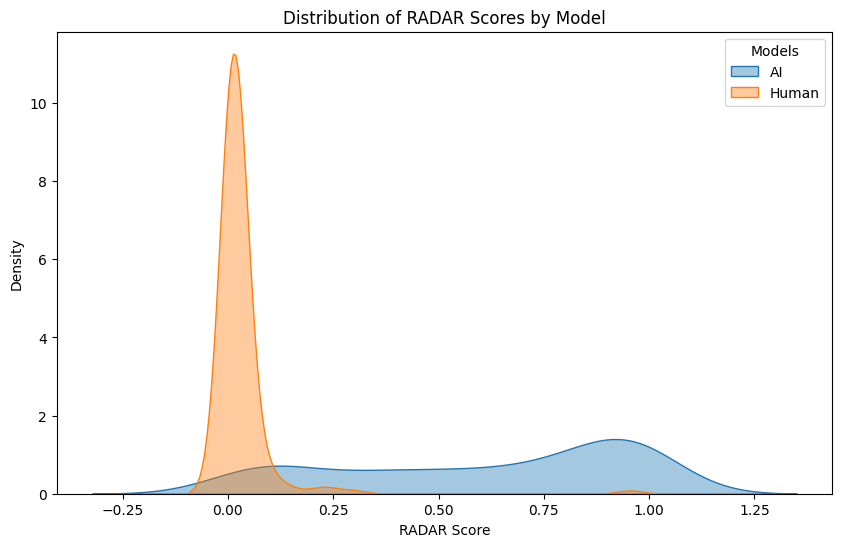

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_col = "source"
score_col = "radar_score"

models = combined_df[model_col].unique()

# Plot KDE for smooth distributions
plt.figure(figsize=(10, 6))
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    sns.kdeplot(subset[score_col].dropna(), label=model, fill=True, alpha=0.4)  # Fill for better visibility

# Add labels and title
plt.xlabel("RADAR Score")
plt.ylabel("Density")
plt.title("Distribution of RADAR Scores by Model")
plt.legend(title="Models")

# Show plot
plt.show()

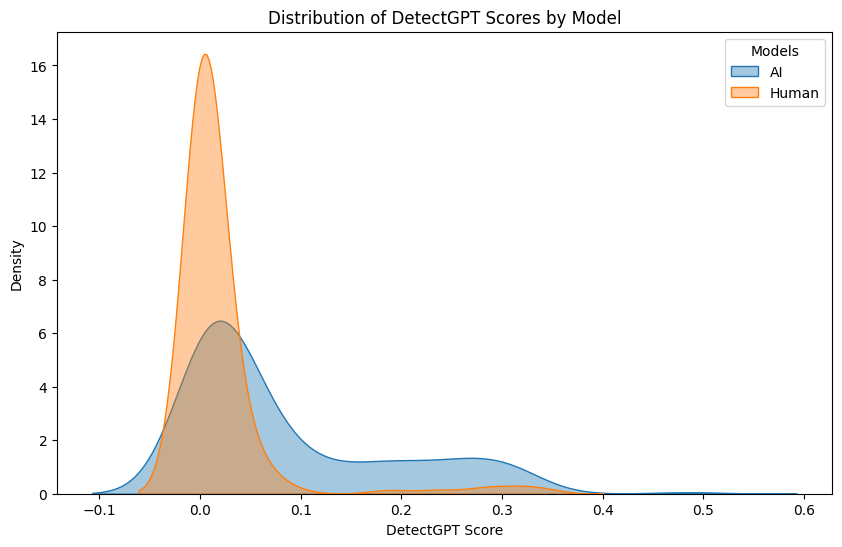

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_col = "source"
score_col = "detectgpt_score"

models = combined_df[model_col].unique()

# Plot KDE for smooth distributions
plt.figure(figsize=(10, 6))
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    sns.kdeplot(subset[score_col].dropna(), label=model, fill=True, alpha=0.4)  # Fill for better visibility

# Add labels and title
plt.xlabel("DetectGPT Score")
plt.ylabel("Density")
plt.title("Distribution of DetectGPT Scores by Model")
plt.legend(title="Models")

# Show plot
plt.show()

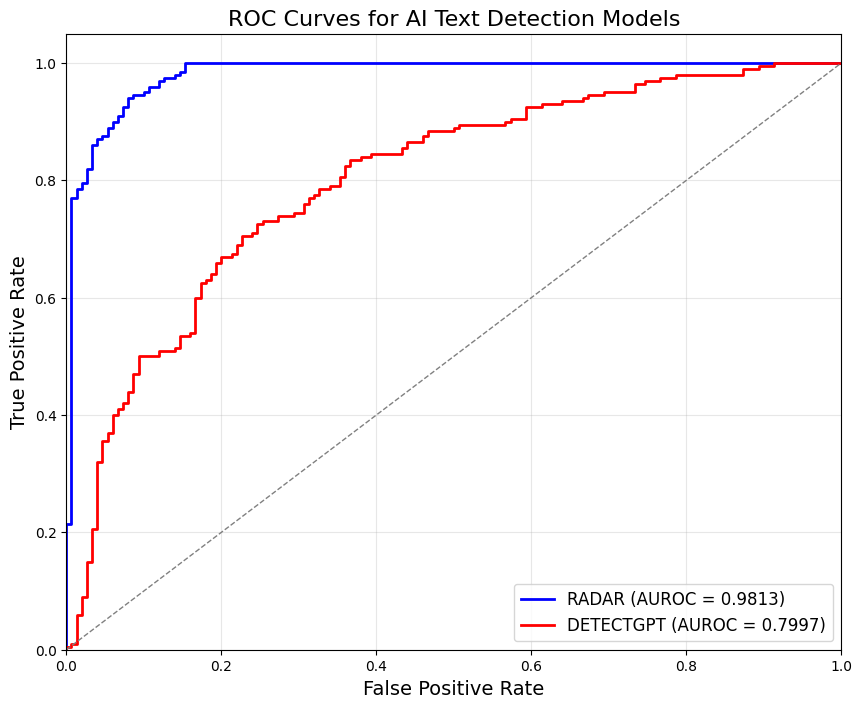

In [142]:
from sklearn.metrics import roc_curve

# Calculate ROC curve points for both detectors
fpr_radar, tpr_radar, _ = roc_curve(combined_df['label'], combined_df['radar_score'])
fpr_wild, tpr_wild, _ = roc_curve(combined_df['label'], combined_df['detectgpt_score'])

# Create a figure with appropriate size
plt.figure(figsize=(10, 8))

# Plot both ROC curves
plt.plot(fpr_radar, tpr_radar, color='blue', lw=2,
         label=f'RADAR (AUROC = {auroc_radar:.4f})')
plt.plot(fpr_wild, tpr_wild, color='red', lw=2,
         label=f'DETECTGPT (AUROC = {auroc_detectgpt:.4f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Add labels and formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for AI Text Detection Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

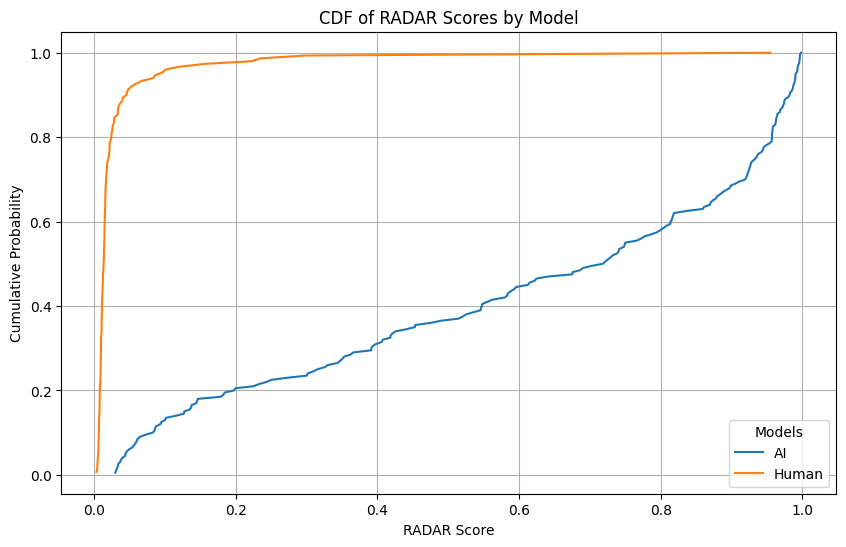

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_col = "source"
score_col = "radar_score"

models = combined_df[model_col].unique()

plt.figure(figsize=(10, 6))

# Loop through Human and AI separately
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    scores = subset[score_col].dropna()
    sorted_scores = np.sort(scores)
    cdf = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.plot(sorted_scores, cdf, label=model)

# Add labels and title
plt.xlabel("RADAR Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of RADAR Scores by Model")
plt.legend(title="Models")
plt.grid(True)
plt.show()


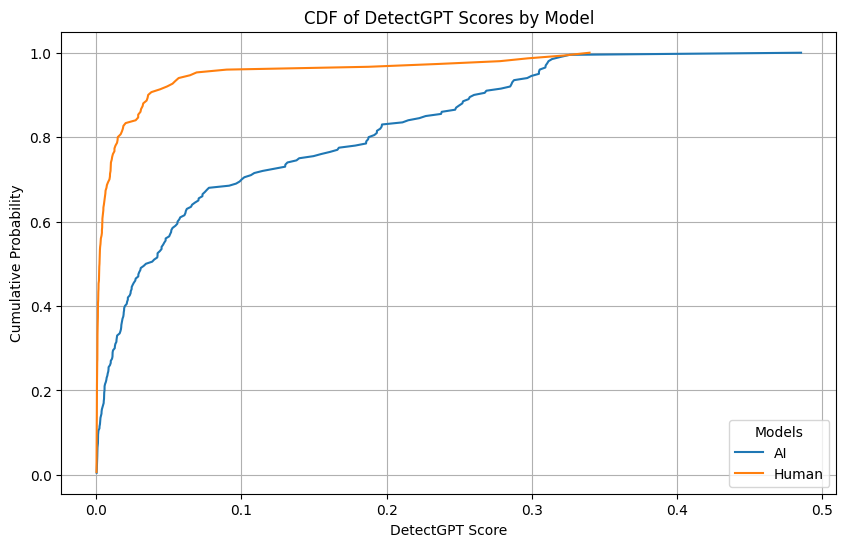

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_col = "source"
score_col = "detectgpt_score"

models = combined_df[model_col].unique()

plt.figure(figsize=(10, 6))

# Loop through Human and AI separately
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    scores = subset[score_col].dropna()
    sorted_scores = np.sort(scores)
    cdf = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.plot(sorted_scores, cdf, label=model)

# Add labels and title
plt.xlabel("DetectGPT Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of DetectGPT Scores by Model")
plt.legend(title="Models")
plt.grid(True)
plt.show()
